# Analysis of ads revenue in mobile games

## Overview of prerequisites

### Purpose and key terminology

The purpose of the following notebook is to explore the data about advertisement in mobile games, particularly, its *format*.

> *Format* defines the way ad is presented to user. Ad could be shown in full screen (**interstitial**), as a horizontal banner at some part of screen (**banner**), or serve as an optional way to collect in-game resources such as reduction in waiting time, extra money, enforcements, and other valuable things (**rewarded video**).

There is an ad metric called **CPM**. It reflects the money paid for ad by advertiser.

> CPM (Cost Per Mille, *French*) is the cost an advertiser pays for $1,000$ ad impressions = $\large\frac{\text{Total Cost of Ad Campaign}}{\text{Total Number of Ad Impressions}}$$ \times 1000$.

**eCPM** is another sub-metric of CPM, and it shows the efficiency of showing ads to users.

> eCPM is the measure of ad monetization efficiency of person (for example, app author) selling a place for ad = $\large\frac{\text{Total Ad Revenue}}{\text{Total Number of Ad Impressions}}$$\times 1000$.

While CPM represents cost for advertisers, eCPM represents revenue for publishers, and the two are not necessarily equal. For example, company $X$ decided to buy $10,000$ ad impressions for $\$50$ from company $Y$. However, the campaign went even better, and $Y$ delivered $15,000$ ad impressions. That is, CPM = $\large\frac{\$50}{10,000}$$\times 1,000 = 5 \ \frac{\$}{1,000\text{ ads}}$. However, eCPM = $\large\frac{\$50}{15,000}$$\times 1,000 = 3.33 \ \frac{\$}{1,000\text{ ads}}$. eCPM is lower than CPM, meaning that revenue from campaign to $X$ ($X$ lost some profit) is lower than amount received from $Y$ ($Y$ made extra profit). If eCPM = CPM (which is the case when campaign went exactly as it was planned), no one makes extra money.

### Dataset

Dataset contains information about users watching particular *format* of ad. There are regional, technical, and other features. IOS platform is not presented.

## Analysis

### Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.rcParams.update({"font.size": 14})
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv("us events ad_revenue filtered 03.02-07.02.csv")
df

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860074,JLSQY2nx1NQ,12,Samsung,Galaxy S21 Ultra 5G,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 08:29:27,1643866167,2022-02-03 08:29:37,1643866177,wifi,Verizon,US,Elmira
860075,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 02:12:51,1643843571,2022-02-03 02:14:48,1643843688,cell,Verizon,US,Cherry Hill
860076,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 02:13:06,1643843586,2022-02-03 02:14:48,1643843688,cell,Verizon,US,Cherry Hill
860077,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 02:13:17,1643843597,2022-02-03 02:14:48,1643843688,cell,Verizon,US,Cherry Hill


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860079 entries, 0 to 860078
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   profile_id               860065 non-null  object
 1   os_version               860079 non-null  object
 2   device_manufacturer      860079 non-null  object
 3   device_model             860079 non-null  object
 4   device_type              860079 non-null  object
 5   device_locale            860079 non-null  object
 6   event_name               860079 non-null  object
 7   event_json               860079 non-null  object
 8   event_datetime           860079 non-null  object
 9   event_timestamp          860079 non-null  int64 
 10  event_receive_datetime   860079 non-null  object
 11  event_receive_timestamp  860079 non-null  int64 
 12  connection_type          860079 non-null  object
 13  operator_name            841200 non-null  object
 14  country_iso_code    

Convert to appropriate datetime type:

In [4]:
%%time

datetimes = [c for c in df.columns if re.search("datetime", c)]
for d in datetimes:
    df[d] = df[d].apply(pd.to_datetime)

CPU times: user 1min, sys: 323 ms, total: 1min
Wall time: 1min


Check for columns of constant value and drop them:

In [5]:
df["country_iso_code"].value_counts(), df["event_name"].value_counts(), df["device_locale"].value_counts()

(US    860079
 Name: country_iso_code, dtype: int64,
 c_ad_revenue    860079
 Name: event_name, dtype: int64,
 en_US         856257
 en_GB           1543
 en_IN            875
 en_CA            718
 en_NL            438
 ko_KR            147
 fr_FR             43
 zh-Hant_TW        41
 en_AU             17
 Name: device_locale, dtype: int64)

In [6]:
drop = ["country_iso_code", "event_name"]
df.drop(drop, axis=1, inplace=True)

Decide what features to extract from "event_json":

In [7]:
df["event_json"].loc[0]

'{"ad_type":"banner","placement":"","view_index":1,"session_view_index":0,"cur_ticks":637795729492245130,"session_length":705.8807,"revenue":0.000510313,"ads_ltv":0.487876676518837,"ecpm_sma":0.511508107185364,"normalized_ecpm_sma":0.511508107185364,"value":0.000510313,"currency":"USD","ad_country_code":"US","network_name":"Google AdMob","ad_unit_id":"64c6b1114ea8c1cc","ad_network_placement":"ca-app-pub-7511632782617496/8825263691","creativeId":"CJ3XirfD5vUCFYPnKAUdG3MOYQ"}'

Make dicts from strings:

In [8]:
%%time

df["event_json"] = df["event_json"].apply(eval)

CPU times: user 36.4 s, sys: 268 ms, total: 36.7 s
Wall time: 36.7 s


In [9]:
def convert_event(df, extract, c="event_json"):
    """
    event: list of features to extract from c.
    c: "event_json" column by default.
    """
    for e in extract:
        df[e] = df[c].apply(lambda x: x[e])
    return df

Extract features from "event_json" feature:

In [10]:
df = convert_event(df, extract=["ad_type", "view_index", "session_length", "revenue", "ecpm_sma", "ads_ltv"])

Make sure everything went correctly:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860079 entries, 0 to 860078
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   profile_id               860065 non-null  object        
 1   os_version               860079 non-null  object        
 2   device_manufacturer      860079 non-null  object        
 3   device_model             860079 non-null  object        
 4   device_type              860079 non-null  object        
 5   device_locale            860079 non-null  object        
 6   event_json               860079 non-null  object        
 7   event_datetime           860079 non-null  datetime64[ns]
 8   event_timestamp          860079 non-null  int64         
 9   event_receive_datetime   860079 non-null  datetime64[ns]
 10  event_receive_timestamp  860079 non-null  int64         
 11  connection_type          860079 non-null  object        
 12  operator_name   

### Data Analysis

#### Mean eCPM values for users based on ad type

##### Using boxplot

The values should be first grouped by `ad_type` and then by `profile_id`.

In [12]:
def plot_mean_ecpm(df):
    """
    Boxplot to aggregate `df` by `profile_id` and get mean `ecpm_sma` values for every `ad_type` unique value.
    """
    formats = df.ad_type.value_counts().index
    fig, axes = plt.subplots(figsize=(15,6), nrows=1, ncols=3)
    fig.suptitle("Distributions of eCPM means based on ad type.", fontweight="bold")
    for i, f in enumerate(formats):
        data = df[df["ad_type"] == f]
        sns.boxplot(ax=axes[i], x=data.groupby(["profile_id"])["ecpm_sma"].mean())
        axes[i].set(title=f"{f} ad type",
                    xlabel="mean eCPM values")

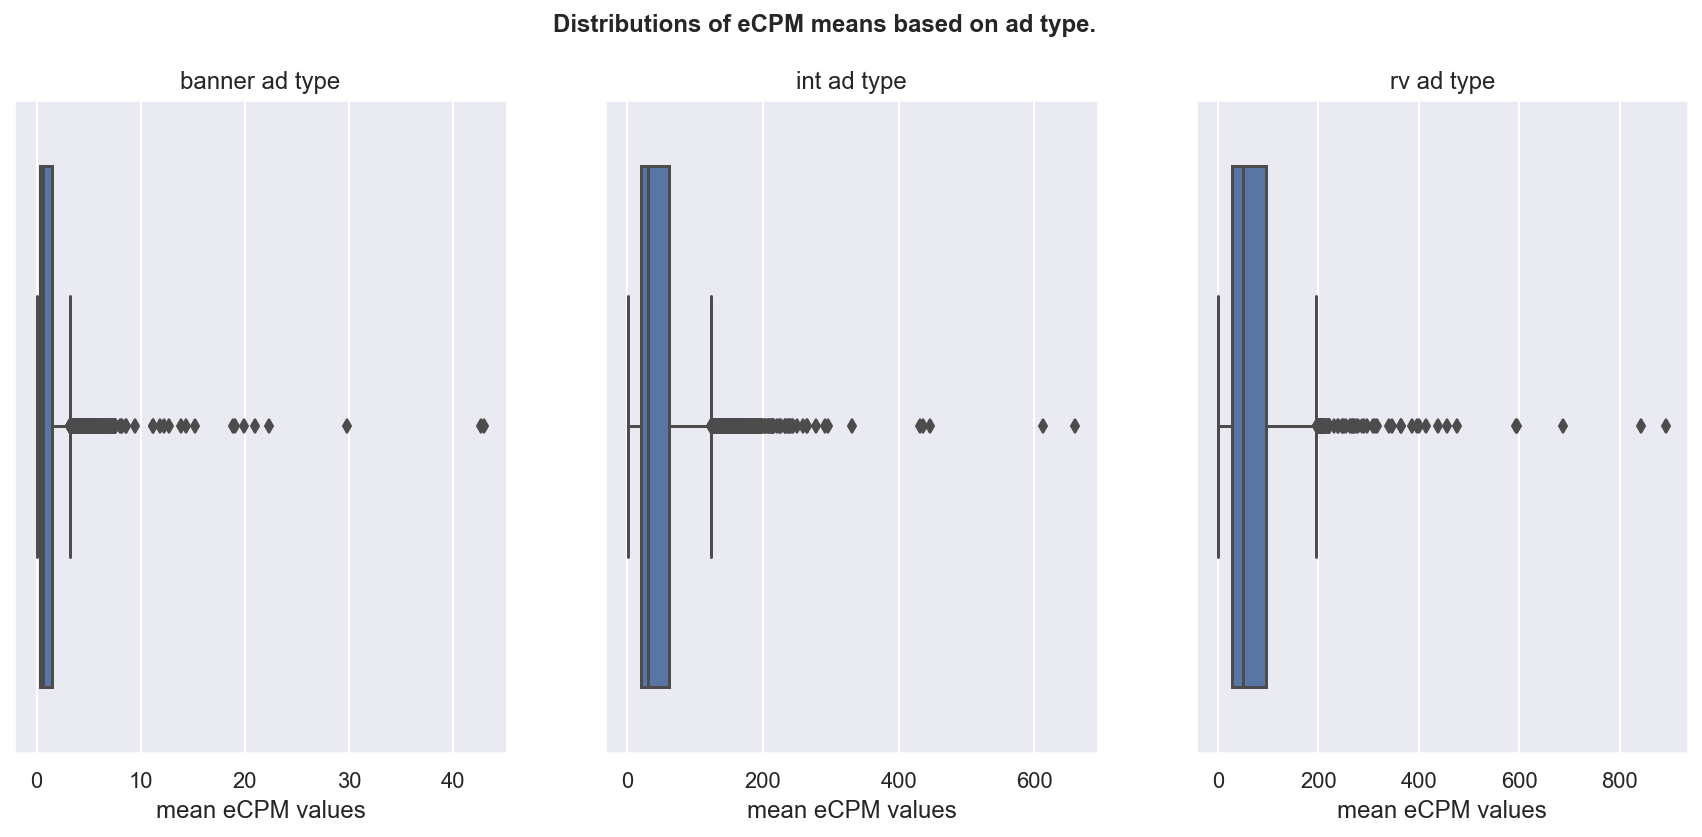

In [13]:
plot_mean_ecpm(df)

**Boxplots** illustrates that there are many *outliers* (i.e. values that fall apart from sample mean, here, beyond only $Q3$) and therefore *fails* to present distribution properly. Indeed, this is true since advertisement is type of marketing which has a power of quantity. However, in that case, outliers are people who provided most benefit (higher eCPM vales), and therefore are a "*target*" of business task. In purpose of visualization of the rest of distribution, one-tail cutoff will be used: **first $95\%$** of data (of mean eCPM values of every ad type) to be visualized.

##### Omit outliers and use PDFs (kde)

In [14]:
def plot_mean_ecpm_threshold(df, threshold=0.95):
    formats = df.ad_type.value_counts().index
    fig, axes = plt.subplots(figsize=(15,6), nrows=1, ncols=3, sharey=True)
    fig.suptitle("Distributions of eCPM means based on ad type with one-tail cutoff.", fontweight="bold")
    for i, f in enumerate(formats):
        data = df[df["ad_type"] == f]
        x = data.groupby(["profile_id"])["ecpm_sma"].mean()
        x = x[x < np.quantile(x, threshold)]
        
        sns.histplot(ax=axes[i], x=x, kde=True, label=f"Mean: ${np.mean(x):.3f}")
        axes[i].set(title=f"{f} ad type with {int(100*threshold)}% of data",
                    xlabel="mean eCPM values, $")
        
        axes[i].legend()

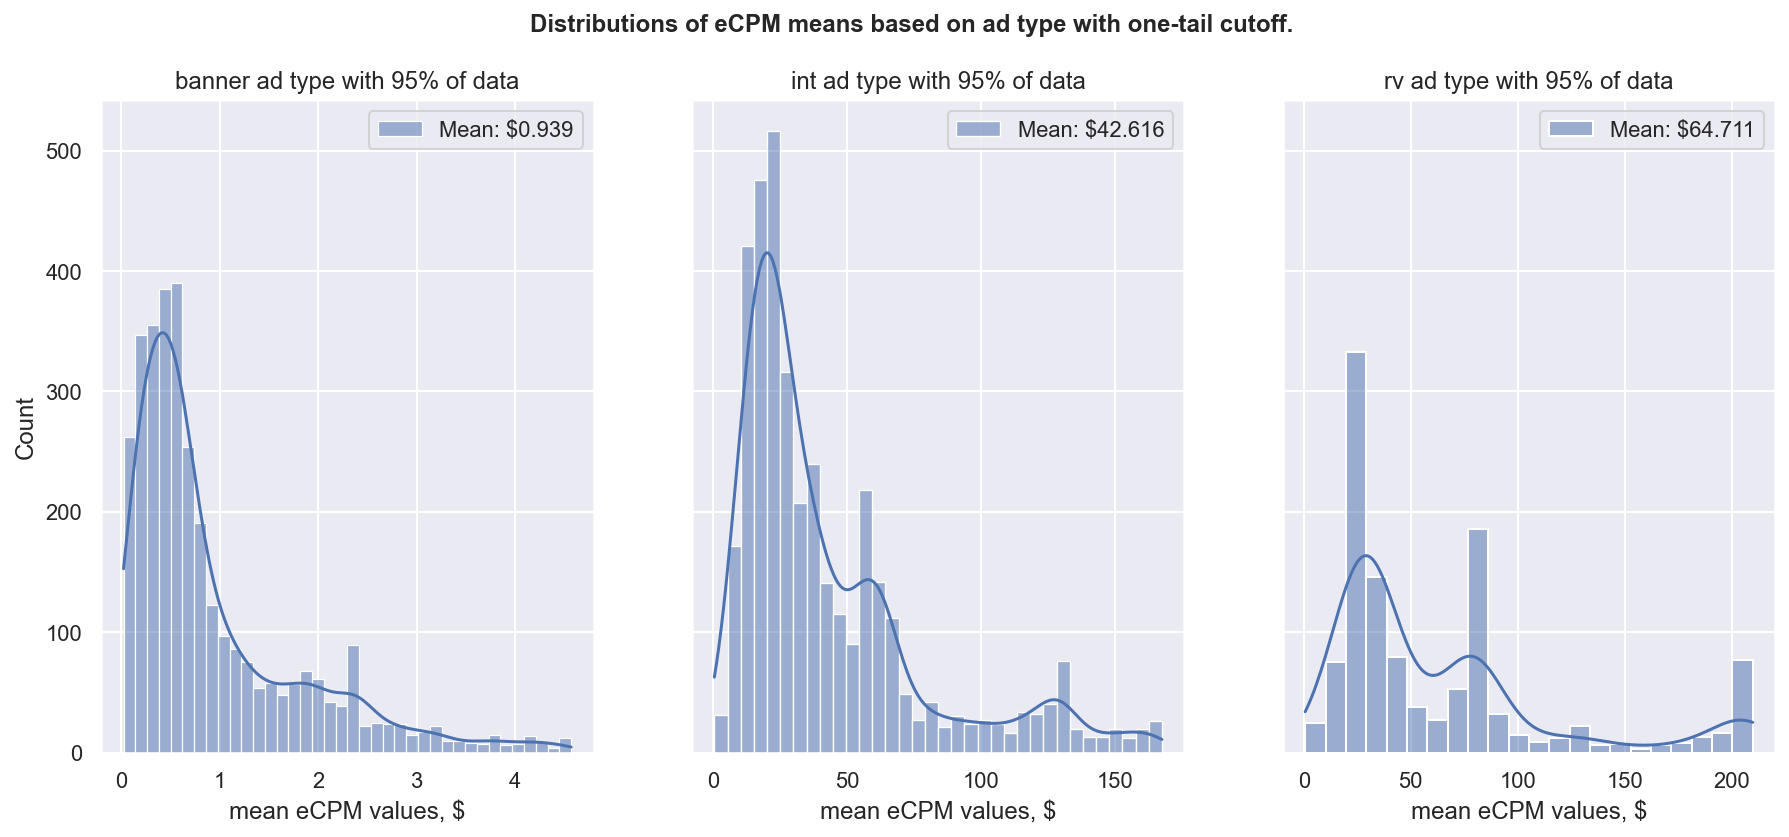

In [15]:
plot_mean_ecpm_threshold(df, threshold=0.95)

As it could be seen, ad types distributions are Gaussian skewed to left (each to different extent). Moreover, `banner` type provides best illustration - its mean value of eCPM is close to \\$1, whereas `int` and `rv` have much larger means (\\$42 and \\$64 respectively). That is, efficiencies of `int` and `rv` are higher. It means that `ad_type` provides one very homogeneous group (`banner`), but two other ones greately overlap (`int` and `rv`).

Nevertheless, as far as level of understanding about CPM and eCPM improved by internet research, comparison of absolute values only (i.e. have only eCPM values) is not totally relevant. For instance, one could buy `banner` for \\$5 CPM and have \\$1 eCPM, indicating profits for ad buyer and losses for ad seller. At the same time, one could buy `rv` for \\$50 CPM and have \\$60 eCPM, indicating reverse situation. Even though eCPM is higher for `rv` than for `banner`, ad buyer could prefer `banner` since it has higher payoff. Thus, knowledge of CPM is required to say about **benefits** of each `ad_type`.

However, histograms above still can provide valuable information. Clearly, true CPM value should be close to mean eCPM point, since both ad seller and buyer try to maximize the profit. It is very unlikely for `banner` CPM to be around \\$2 or \\$3, since ad buyer (assuming buyer company conducts the same analysis as this one) would argue to lower the `banner` CPM since it has negative payoff for him. Moreover, `banner` eCPM mean values gradually decrease after single peak at $\approx \$0.5$, having only one bar significantly higher than kde line (i.e. estimated distribution function) at $\approx \$2.3$, showing fairly monotonical decline.

The situation is different for `rv`. It has 3rd highest peak at the rightmost bar and several local maxima of distribution function, not similar to `banner` and `int`. It implies that `rv` has **greater potential to override CPM value** and give seller good payoff. This fact should increase the CPM of `rv` (again, assuming buyer companies share this knowledge). Here, it is not so obvious where the true CPM value lies. The highest peak is at $\approx \$25$, showing **also higher risks** for ad seller and less stability than `banner` has.

`int` ad type resembles `banner` much more than `rv`, having a bit higher "bumps" at right side.

##### Back to outliers

The ommited outliers must be considered as well.

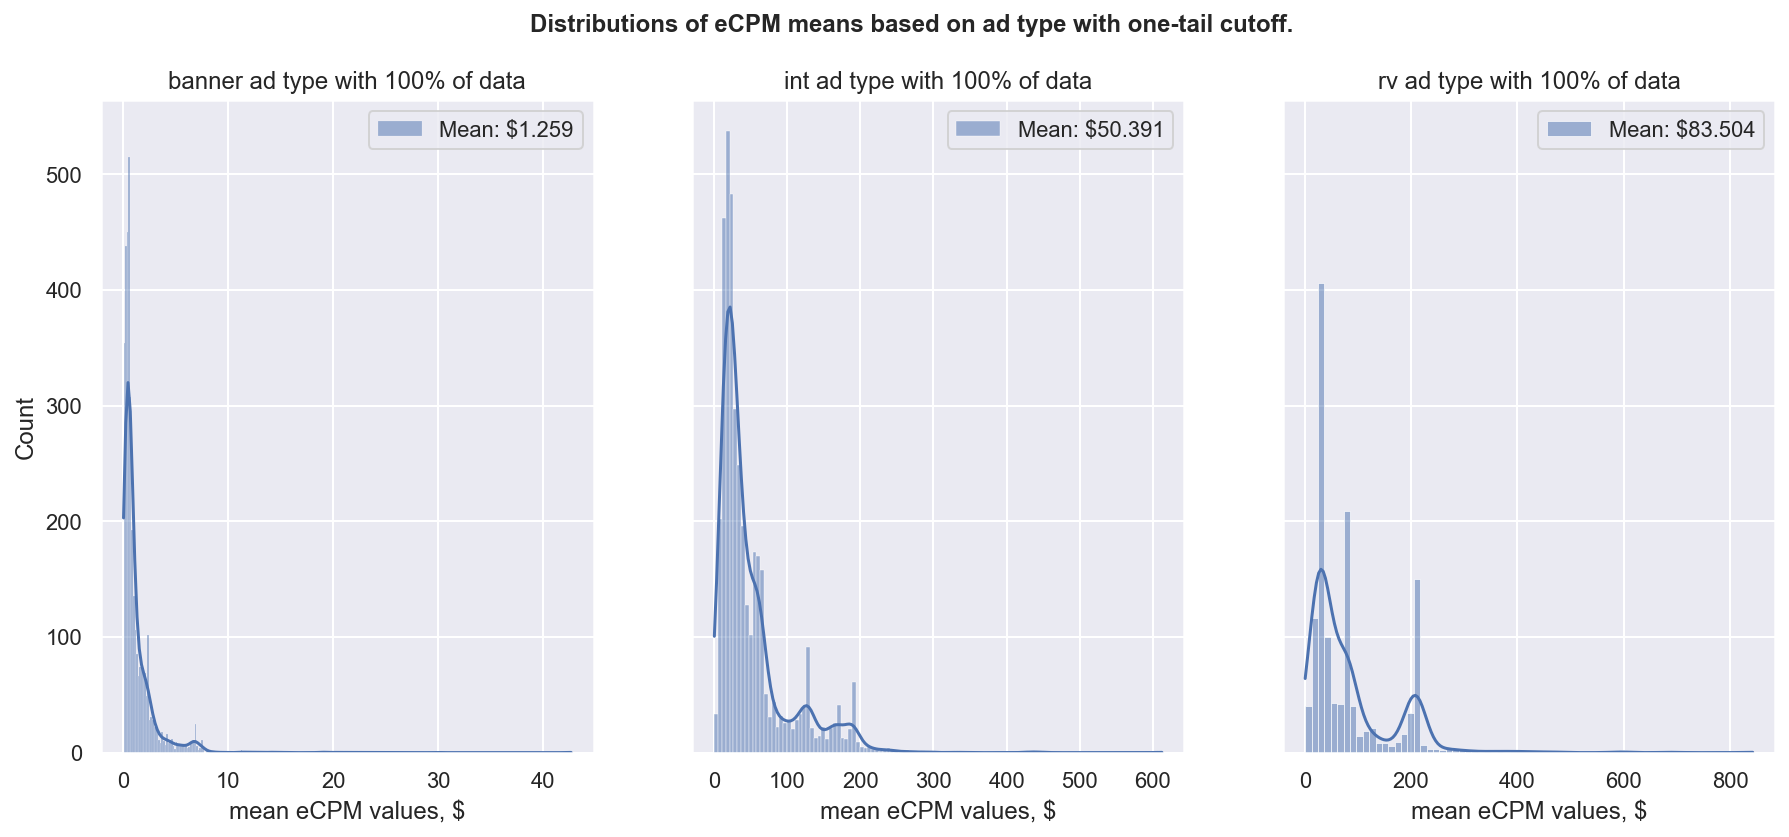

In [16]:
plot_mean_ecpm_threshold(df, threshold=1)

Most importantly, affect of ommited $5\%$ of data (outliers) is huge - they elevate the mean eCPM value of `banner` by $34.07\%$, of `int` - by $18.24\%$, and of `rv` - by $29.04\%$, compared to first $95\%$ of data. However, they represent too little part of all users, which makes them very hard to be targeted (to increase their relative population).

#### Mean eCPM values based on city/OS versions for every ad type

##### `city`

`city` variable has missing values, which will be dropped. Some statistics about `city` and users:

In [17]:
df_city = df.dropna(subset=["city", "profile_id"])
city_num = len(df_city["city"].value_counts().index)
user_num = len(df_city["profile_id"].value_counts().index)
user_city_num = len(df_city.groupby(["profile_id"])["city"].value_counts().index)

print(f"Cities: {city_num}")
print(f"Users: {user_num}")
print(f"User-city pairs: {user_city_num}")

Cities: 920
Users: 2930
User-city pairs: 3477


There are $920$ cities, $2930$ users, and $3,477$ user-city pairs in the dataset, meaning that on average 1 player out of 7 makes operations more than from 1 city. This sounds natural. Also, since the filename is `us events ad_revenue filtered 03.02-07.02.csv`, 4 months period is probably used for dataset. Not 1 day, which would imply that people very likely used VPN, but months from March to June. At summer people tend to travel, visit relatives, friends, etc. Consequently, cities extracted from IPs (or from in-game information provided by players themselves, but this way is not efficient to track geographical changes) are most probably natural movement of clients.

However, `city` is nominal variable meaning that making continuous distribution makes no sense. Furthermore, 920 values of nominal data makes it hard to illustrate. It is possible to use top-N cities or aggregate them by state. The second option will be more relevant.

In order to create feature `state`, [free database of the US states](https://simplemaps.com/data/us-cities), (license for usage is attached in `simplemaps_uscities_basicv1.75` folder) was downloaded but the problem arised - cities from several states have the same names, for example, "*Norwalk*" is a city of 5 different US states:

In [18]:
state_city = pd.read_csv("simplemaps_uscities_basicv1.75/uscities.csv")
state_city[state_city["city"] == "Norwalk"][["city", "state_id", "state_name"]]

,city,state_id,state_name
445,Norwalk,CA,California
529,Norwalk,CT,Connecticut
2590,Norwalk,OH,Ohio
3580,Norwalk,IA,Iowa
17517,Norwalk,WI,Wisconsin


Dataset does not contain any geographical details apart from city. So, state aggregation is not possible, top-N cities of which ad type could be used for illustration.

Function which can plot  top- or bottom-N (any custom range) mean eCPM values aggregated by any column:

In [19]:
def plot_ecpm(df, c, display="ecpm_sma", top=None, bottom=None, min_ops=0, figsize=(15,15)):
    """
    Plots aggregated bar plot, particularly three vertically stacked subplots for three ad types. By default, takes
    the whole range of aggregated values if `top` and `bottom` (used for slicing) parameters are not specified.
    Note that title of subplots is defined by passed `top` and `bottom`. Assumptions:
    * aim to extract from top - positive `top` is passed only.
    * aim to extract from bottom - negative `bottom` is passed only.
    * aim to extract inner range - both `top` and `bottom` are passed.
    
    :param df: dataset containing "ad_type" and "ecpm_sma" columns.
    :param c: feature of dataset to aggregate by.
    :param display: column to display - "espm_sma" be default.
    :param top: upper bound of range, None by default.
    :param bottom: lower bound of range, None by default.
    :param min_ops: minimum number of values in aggregated table required to be considered, if less - dropped.
    """
    adjust = False
    if bottom and top:
        way = "In-range"
        pointer = abs(abs(bottom) - abs(top))
    elif bottom:
        way = "Bottom"
        pointer = abs(bottom)
    elif top:
        way = "Top"
        pointer = abs(top)
    else:
        way = ""
        adjust = True
        
    fig, axes = plt.subplots(figsize=figsize, nrows=3, ncols=1)
    for i, f in enumerate(df["ad_type"].value_counts().index):
        
        indexes = df[df["ad_type"] == f].groupby([c, "profile_id"])[display].count(). \
                                         apply(lambda x: x if x >= min_ops else None). \
                                         dropna().unstack().aggregate(func=sum, axis=1).index

        data = df[df["ad_type"] == f].groupby([c])[display].mean()[indexes]
        data = np.array(sorted(np.c_[data.index, data.values], key=lambda x: x[1], reverse=True)) # sort
        
        if adjust:  # when top and bottom are not passed, `pointer` should every time be adjusted to len of data
            pointer = len(data)
        
        axes[i].bar(x=range(pointer), height=data[:,1][bottom:top])
        axes[i].set_xticks(ticks=range(pointer), labels=data[:,0][bottom:top], rotation=30)
        axes[i].set(title=f"{way} {pointer} (from {len(data)} values) '{c}' for '{f}' ad type.",
                    ylabel=f"Mean '{display}' values, \$")
        axes[i].bar_label(axes[i].containers[0], fontsize=10, fmt="%.2f")
        
        plt.subplots_adjust(hspace=0.4)

Top-20 cities with highest mean eCPM values (aggregated across cities):

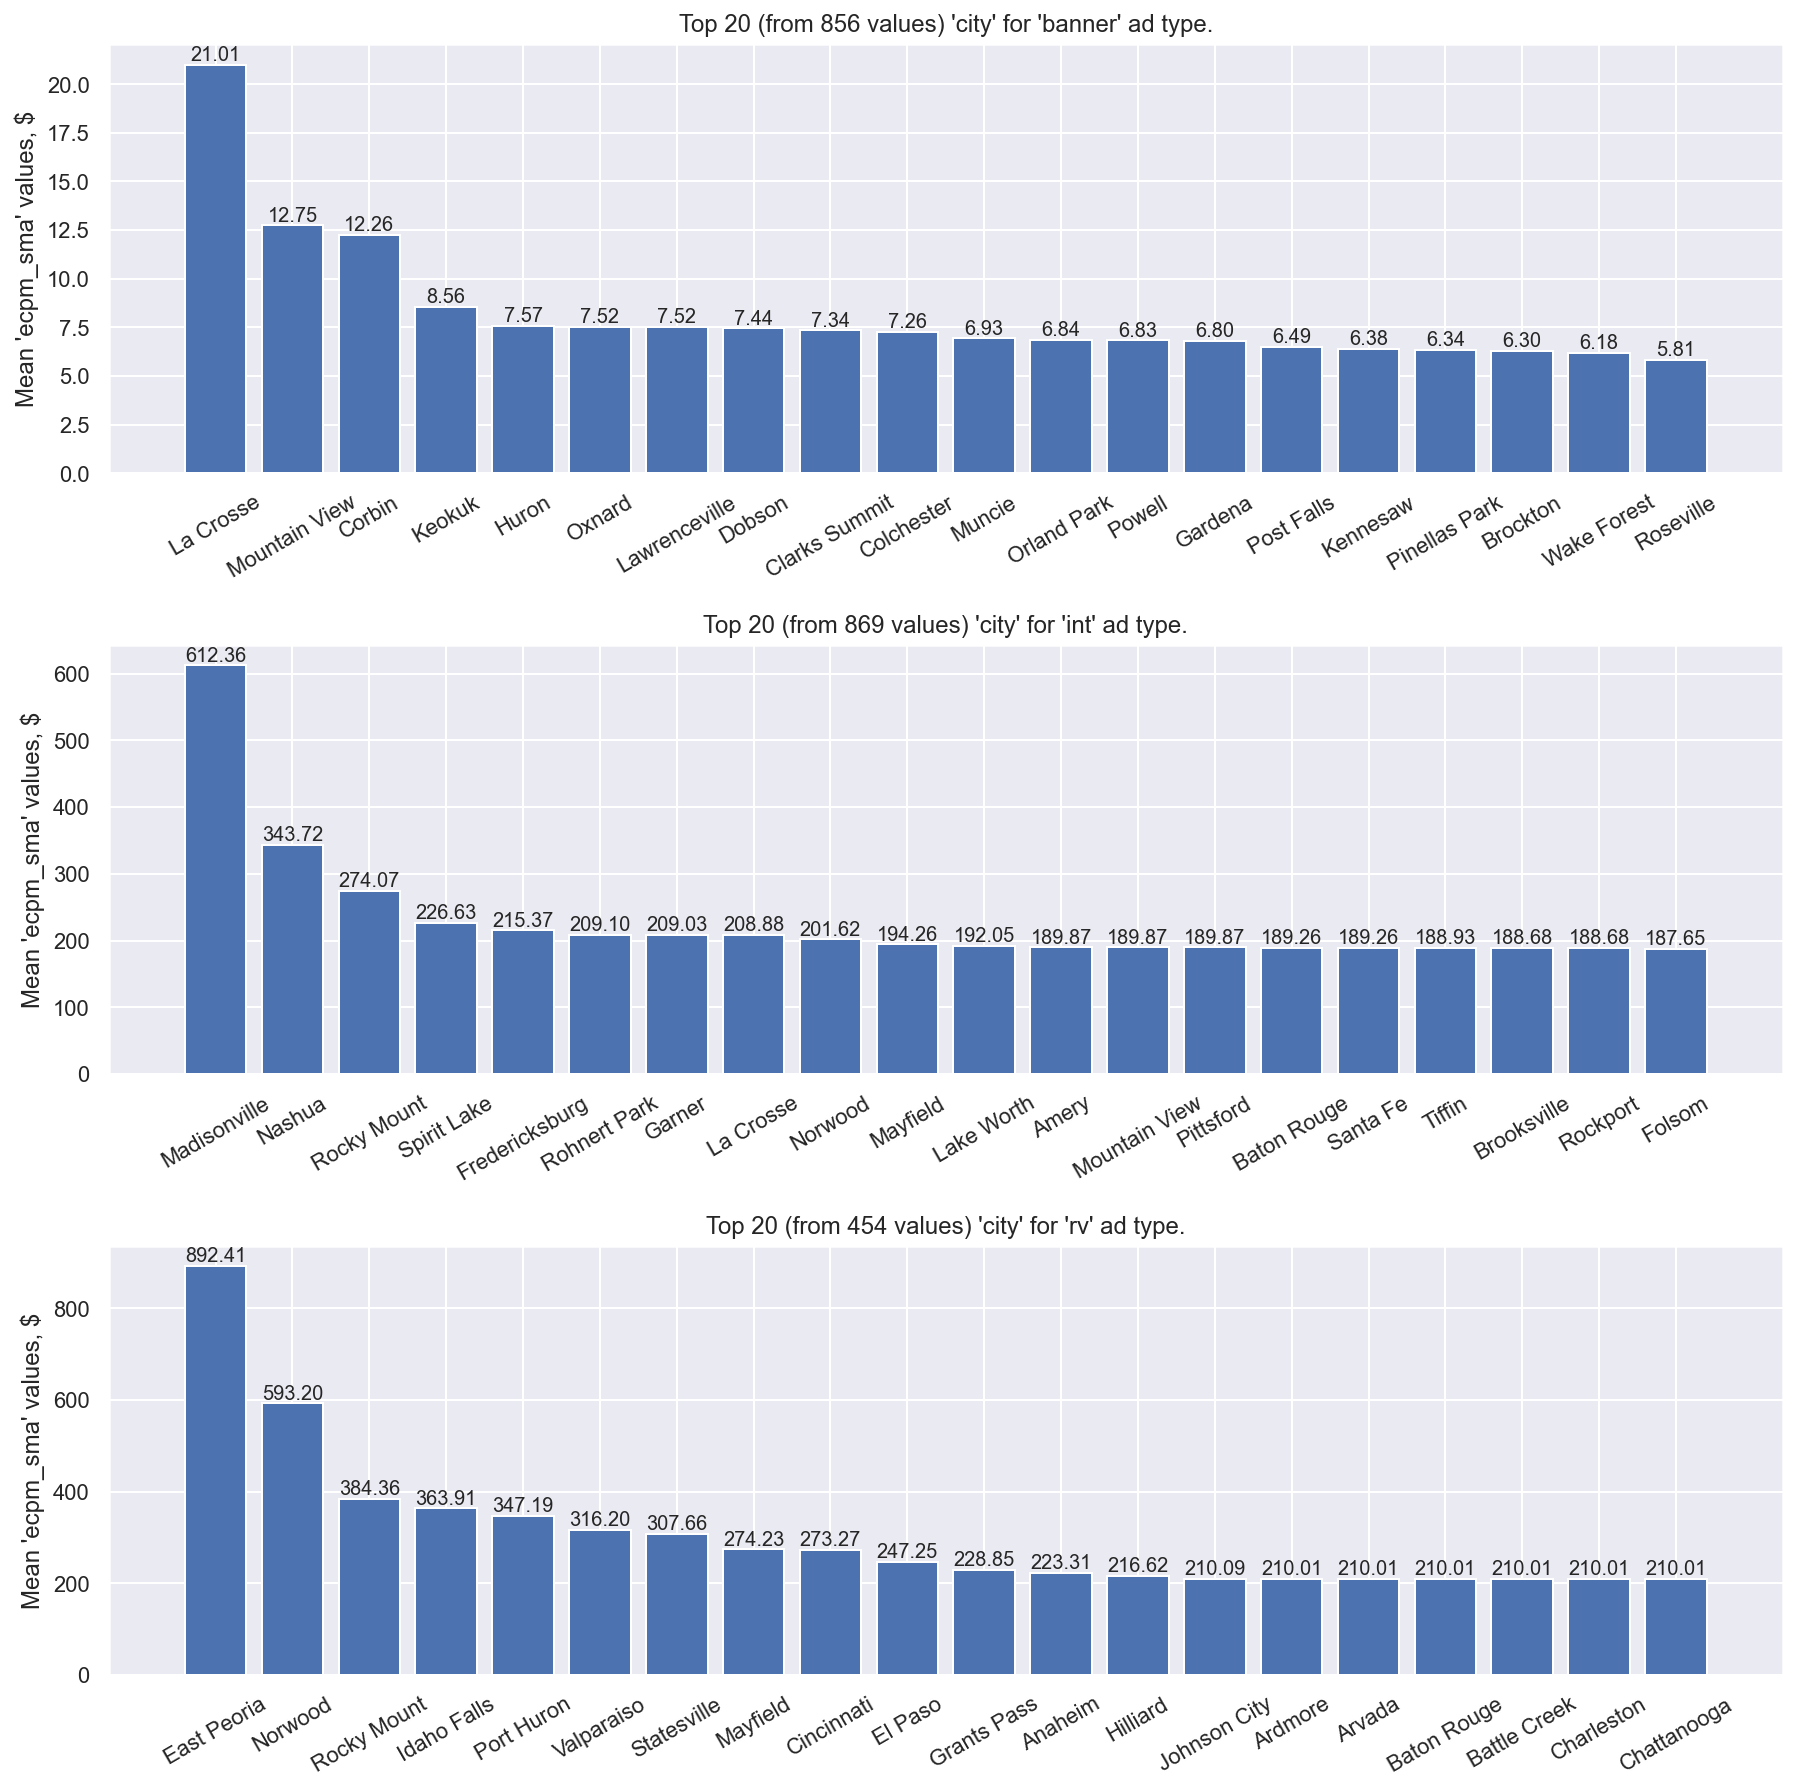

In [20]:
plot_ecpm(df, c="city", top=20, min_ops=0)

It could be seen that *range* of city mean eCPM values is different for `ad_type` values. `banner` has range of $\$20.98$, `int` - $\$609.96$, `rv` - $\$888.37$.

**The problem** is that the graph above **is biased**. Cities with 1 big eCPM are anomalies. It is much more relevant to exclude cities that have less than some minimum number of *operations* (operation - ad impression). This is the way to analyze more stable cities. Consider "East Peoria" city's `rv` operations, which is top-1 city for `rv` according to the graph above:

In [21]:
df[df["ad_type"] == "rv"][df["city"] == "East Peoria"] \
[["profile_id", "device_model", "event_datetime", "ecpm_sma", "city"]]

,profile_id,device_model,event_datetime,ecpm_sma,city
74691,JLtY7hvRXO3,Galaxy S21 Ultra 5G,2022-02-05 09:30:03,908.876160,East Peoria
74733,JLtY7hvRXO3,Galaxy S21 Ultra 5G,2022-02-05 09:41:14,903.012512,East Peoria
74815,JLtY7hvRXO3,Galaxy S21 Ultra 5G,2022-02-05 10:02:31,865.351135,East Peoria


"East Peoria" is top-1 only because of 1 person. Moreover, all three operations were made within 32 minutes, which is essentially one continuous operation. Even though this person provides good profits, city analysis is aimed to get aggregated information. If person moves to another city (goes to college, for example), "East Peoria" disappears from the list at all. As shown below, he or she has 178 operations and all of them are made within 1 day. This kind of one-time operation is outlier and does not contribute to analysis of overall trend.

In [22]:
ep = df[df["profile_id"] == "JLtY7hvRXO3"][df["city"] == "East Peoria"] \
[["profile_id", "device_model", "event_datetime", "ecpm_sma", "city"]]

ep["event_datetime"] = ep["event_datetime"].apply(lambda x: x.day)

days = len(ep["event_datetime"].value_counts().index)

print(f"Different days when user JLtY7hvRXO3 made operations: {days}.")
ep

Different days when user JLtY7hvRXO3 made operations: 1.


,profile_id,device_model,event_datetime,ecpm_sma,city
74649,JLtY7hvRXO3,Galaxy S21 Ultra 5G,5,170.028793,East Peoria
74650,JLtY7hvRXO3,Galaxy S21 Ultra 5G,5,16.263025,East Peoria
74651,JLtY7hvRXO3,Galaxy S21 Ultra 5G,5,14.838788,East Peoria
74652,JLtY7hvRXO3,Galaxy S21 Ultra 5G,5,14.106843,East Peoria
74653,JLtY7hvRXO3,Galaxy S21 Ultra 5G,5,12.898223,East Peoria
...,...,...,...,...,...
74822,JLtY7hvRXO3,Galaxy S21 Ultra 5G,5,3.255696,East Peoria
74823,JLtY7hvRXO3,Galaxy S21 Ultra 5G,5,3.682060,East Peoria
74824,JLtY7hvRXO3,Galaxy S21 Ultra 5G,5,3.519480,East Peoria
74825,JLtY7hvRXO3,Galaxy S21 Ultra 5G,5,3.224206,East Peoria


There is the graph for cities where users are counted only given they made at least 10 operations:

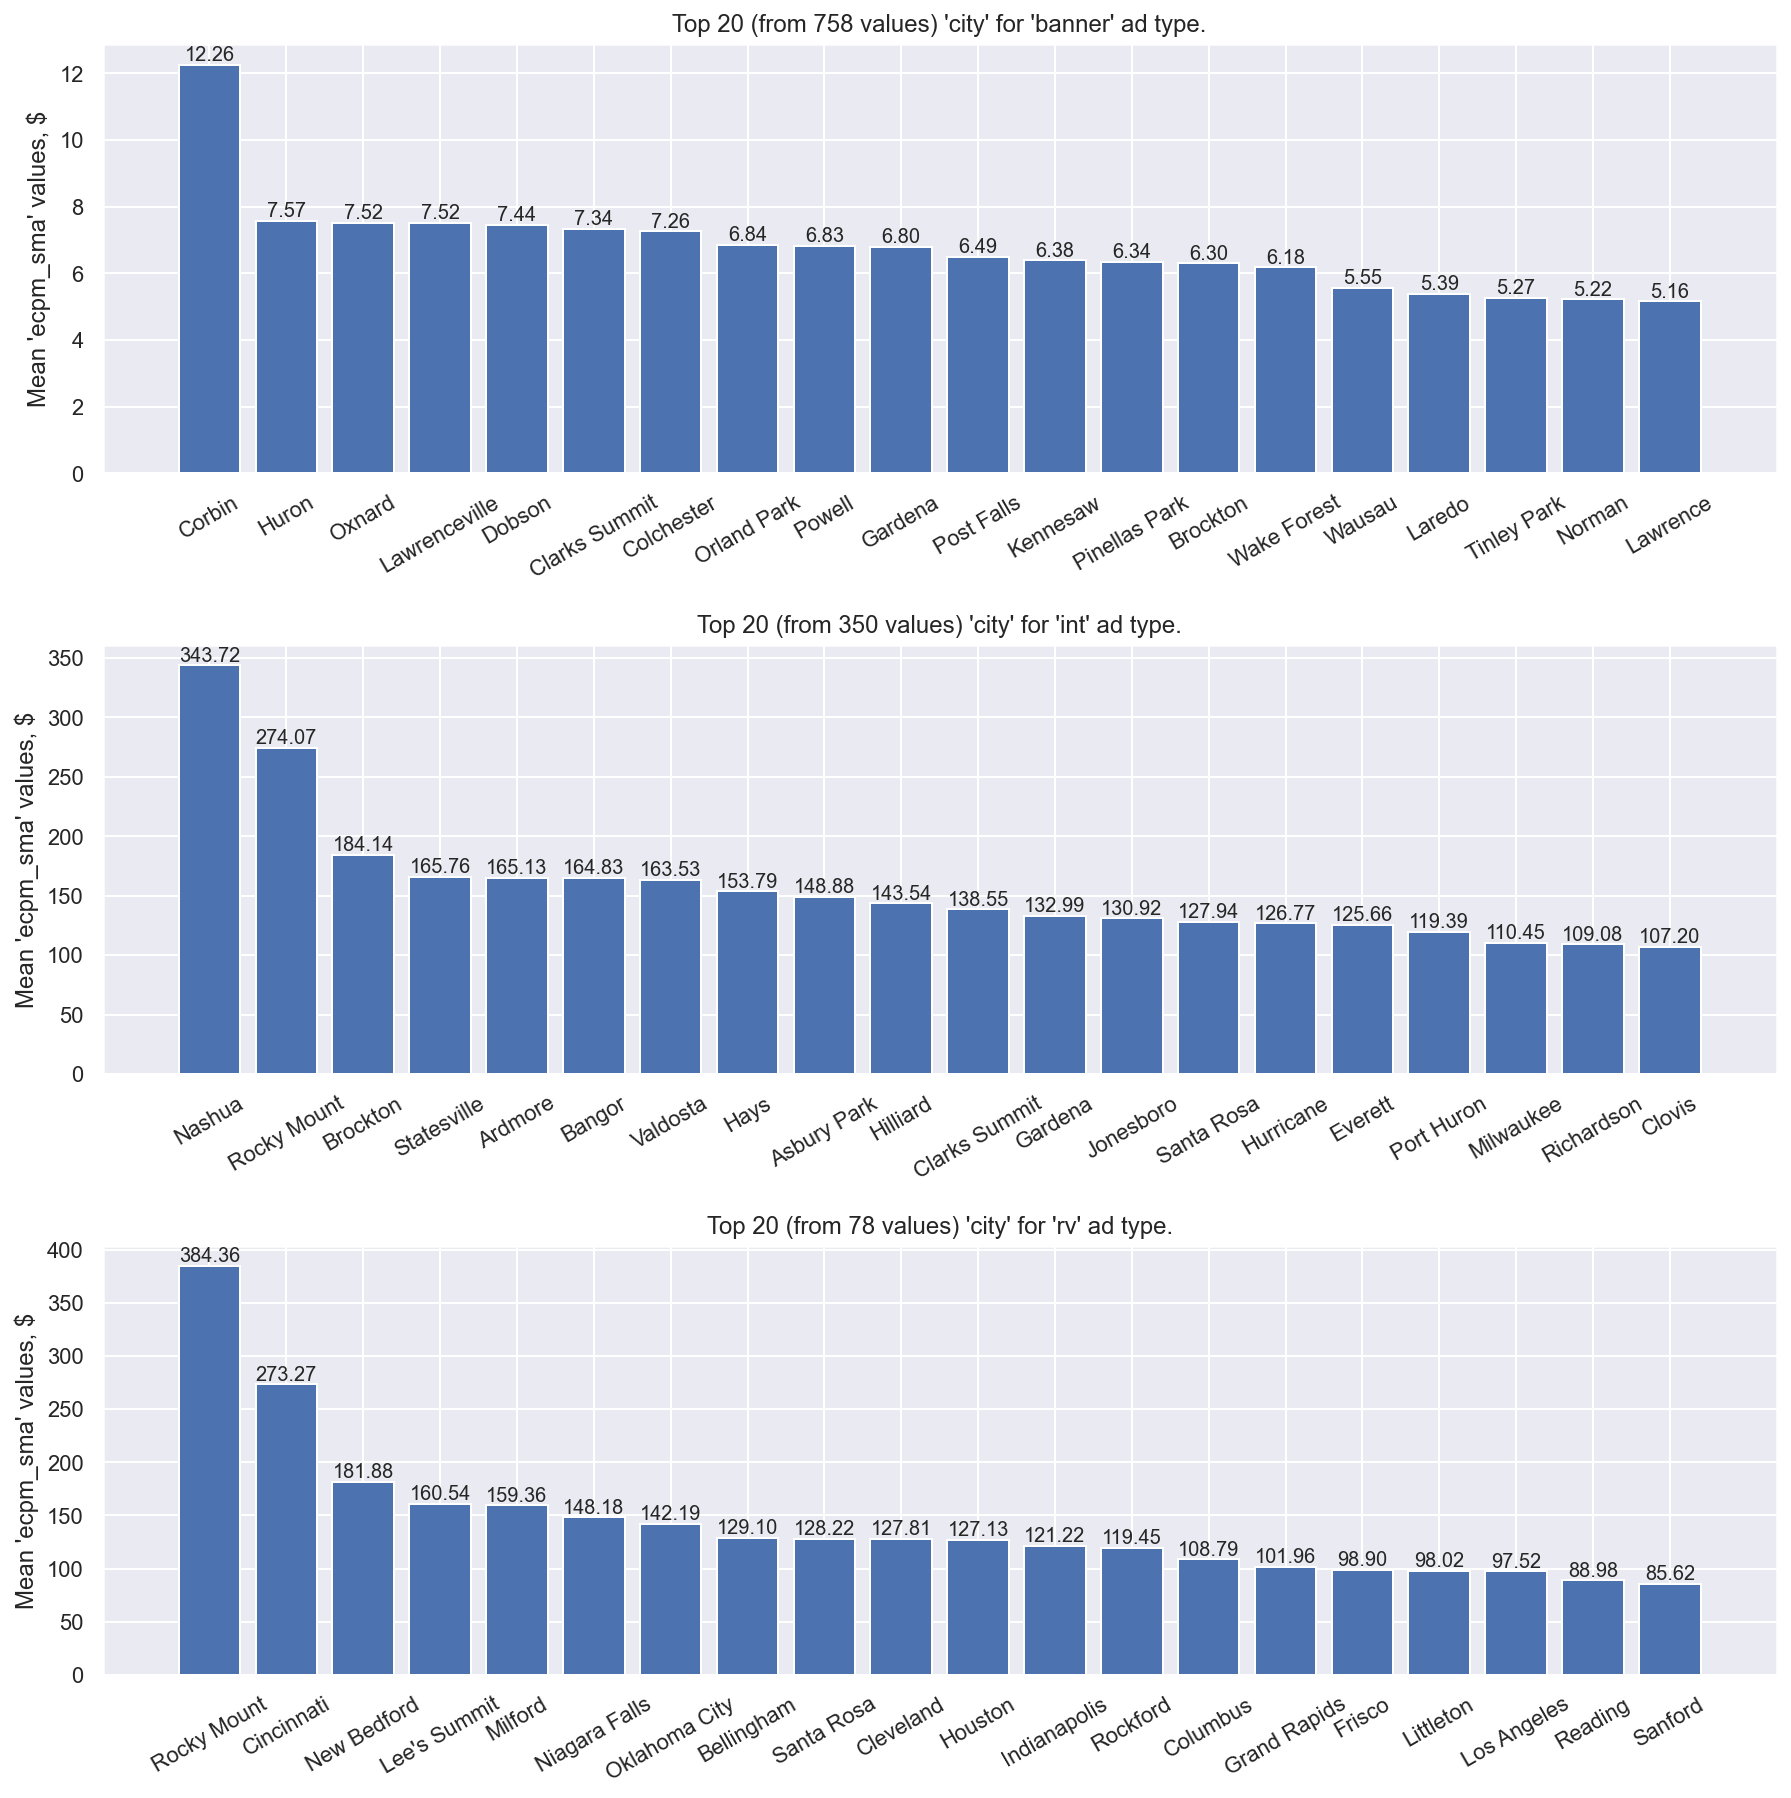

In [23]:
plot_ecpm(df, c="city", top=20, min_ops=10)

Applied restriction on minimum of operations reduced number of `rv` cities from 454 to 78. This illustrates that the restriction is valuable and helps to make analysis more "robust".

Overall, the most efficient way to use `city` feature is to combine it into wider-binned interval, for instance, group by state and look for state-level trends instead of grasping them all at once. The level of eCPM in geographical terms may be linked as to financial level of region, as to regional pecularities, such as Seattle, which is [ranked with highest gaming industry score in the US in 2018](https://www.statista.com/statistics/937067/best-cities-gamers-usa/) (the cities were judged on the basis of gaming environment, internet quality and gamer and developer opportunities).

Thus, in 2018, Seattle was ranked top-1 city for gaming in the US, and there is its summary according to the dataset in current time:

In [24]:
seattle = df_city[df_city["city"] == "Seattle"]

print(f"Seattle")
print("-"*20)
print(f"Total operations: {len(seattle.index)}")
print(f"Mean eCPM 'banner': ${seattle[seattle['ad_type'] == 'banner']['ecpm_sma'].mean():.2f}, \
operations: {len(seattle[seattle['ad_type'] == 'banner'].index)}")
print(f"Mean eCPM 'int': ${seattle[seattle['ad_type'] == 'int']['ecpm_sma'].mean():.2f}, \
operations: {len(seattle[seattle['ad_type'] == 'int'].index)}")
print(f"Mean eCPM 'rv': ${seattle[seattle['ad_type'] == 'rv']['ecpm_sma'].mean():.2f}, \
operations: {len(seattle[seattle['ad_type'] == 'rv'].index)}")

Seattle
--------------------
Total operations: 2903
Mean eCPM 'banner': $1.23, operations: 2758
Mean eCPM 'int': $56.35, operations: 130
Mean eCPM 'rv': $111.15, operations: 15


In `rv`, Seattle is dropped since it does not pass the restriction on minimum of 10 operations, as well as other 376 cities. In the graph above, `Rocky Mount` is the most profitable city based on the results. Its users pass 10 operations restriction.

Furthermore, this analysis could be extended byt applying **time restriction**. For example, users could be counted if they have operations on at least 3 different days, or only 1 operation could be counted in 12-hours period, ensuring that resutls do count users who tend to make several profits and therefore are much more engaged in the game.

Combination of **time restriction** and **minimum operations restriction** is a good idea, and finding the best thresholds for that combinations requires some other aspects. Of course, ad seller would not try to target cities where users make one-time big profits (like East-Peoria case), but choosing minimum value for **minimum operations restriction** should be used by minimization of profit-stability tradeoff. The higher the value, the more *stable* cities are left off (*stable* - many users make many operations across the long time period), but this approach eliminates an opportunity to analyze people who make one- or two-times big eCPM profits. Removing anomalies is correct but *studying* them still can provide valuable information.

These ideas could be implemented in separate analysis particularly for geographical and time details.

##### `os_version`

First, it is not so obvious why some OS versions have subversions included into list, whereas other ones are aggregated into one version. Probably, aggregation went based on some threshold which indicated the degree of difference in eCPM values for OS subversions. As in the diagram below, 7.0 and 7.1.2 have at least twice different eCPM values for every `ad_type`.

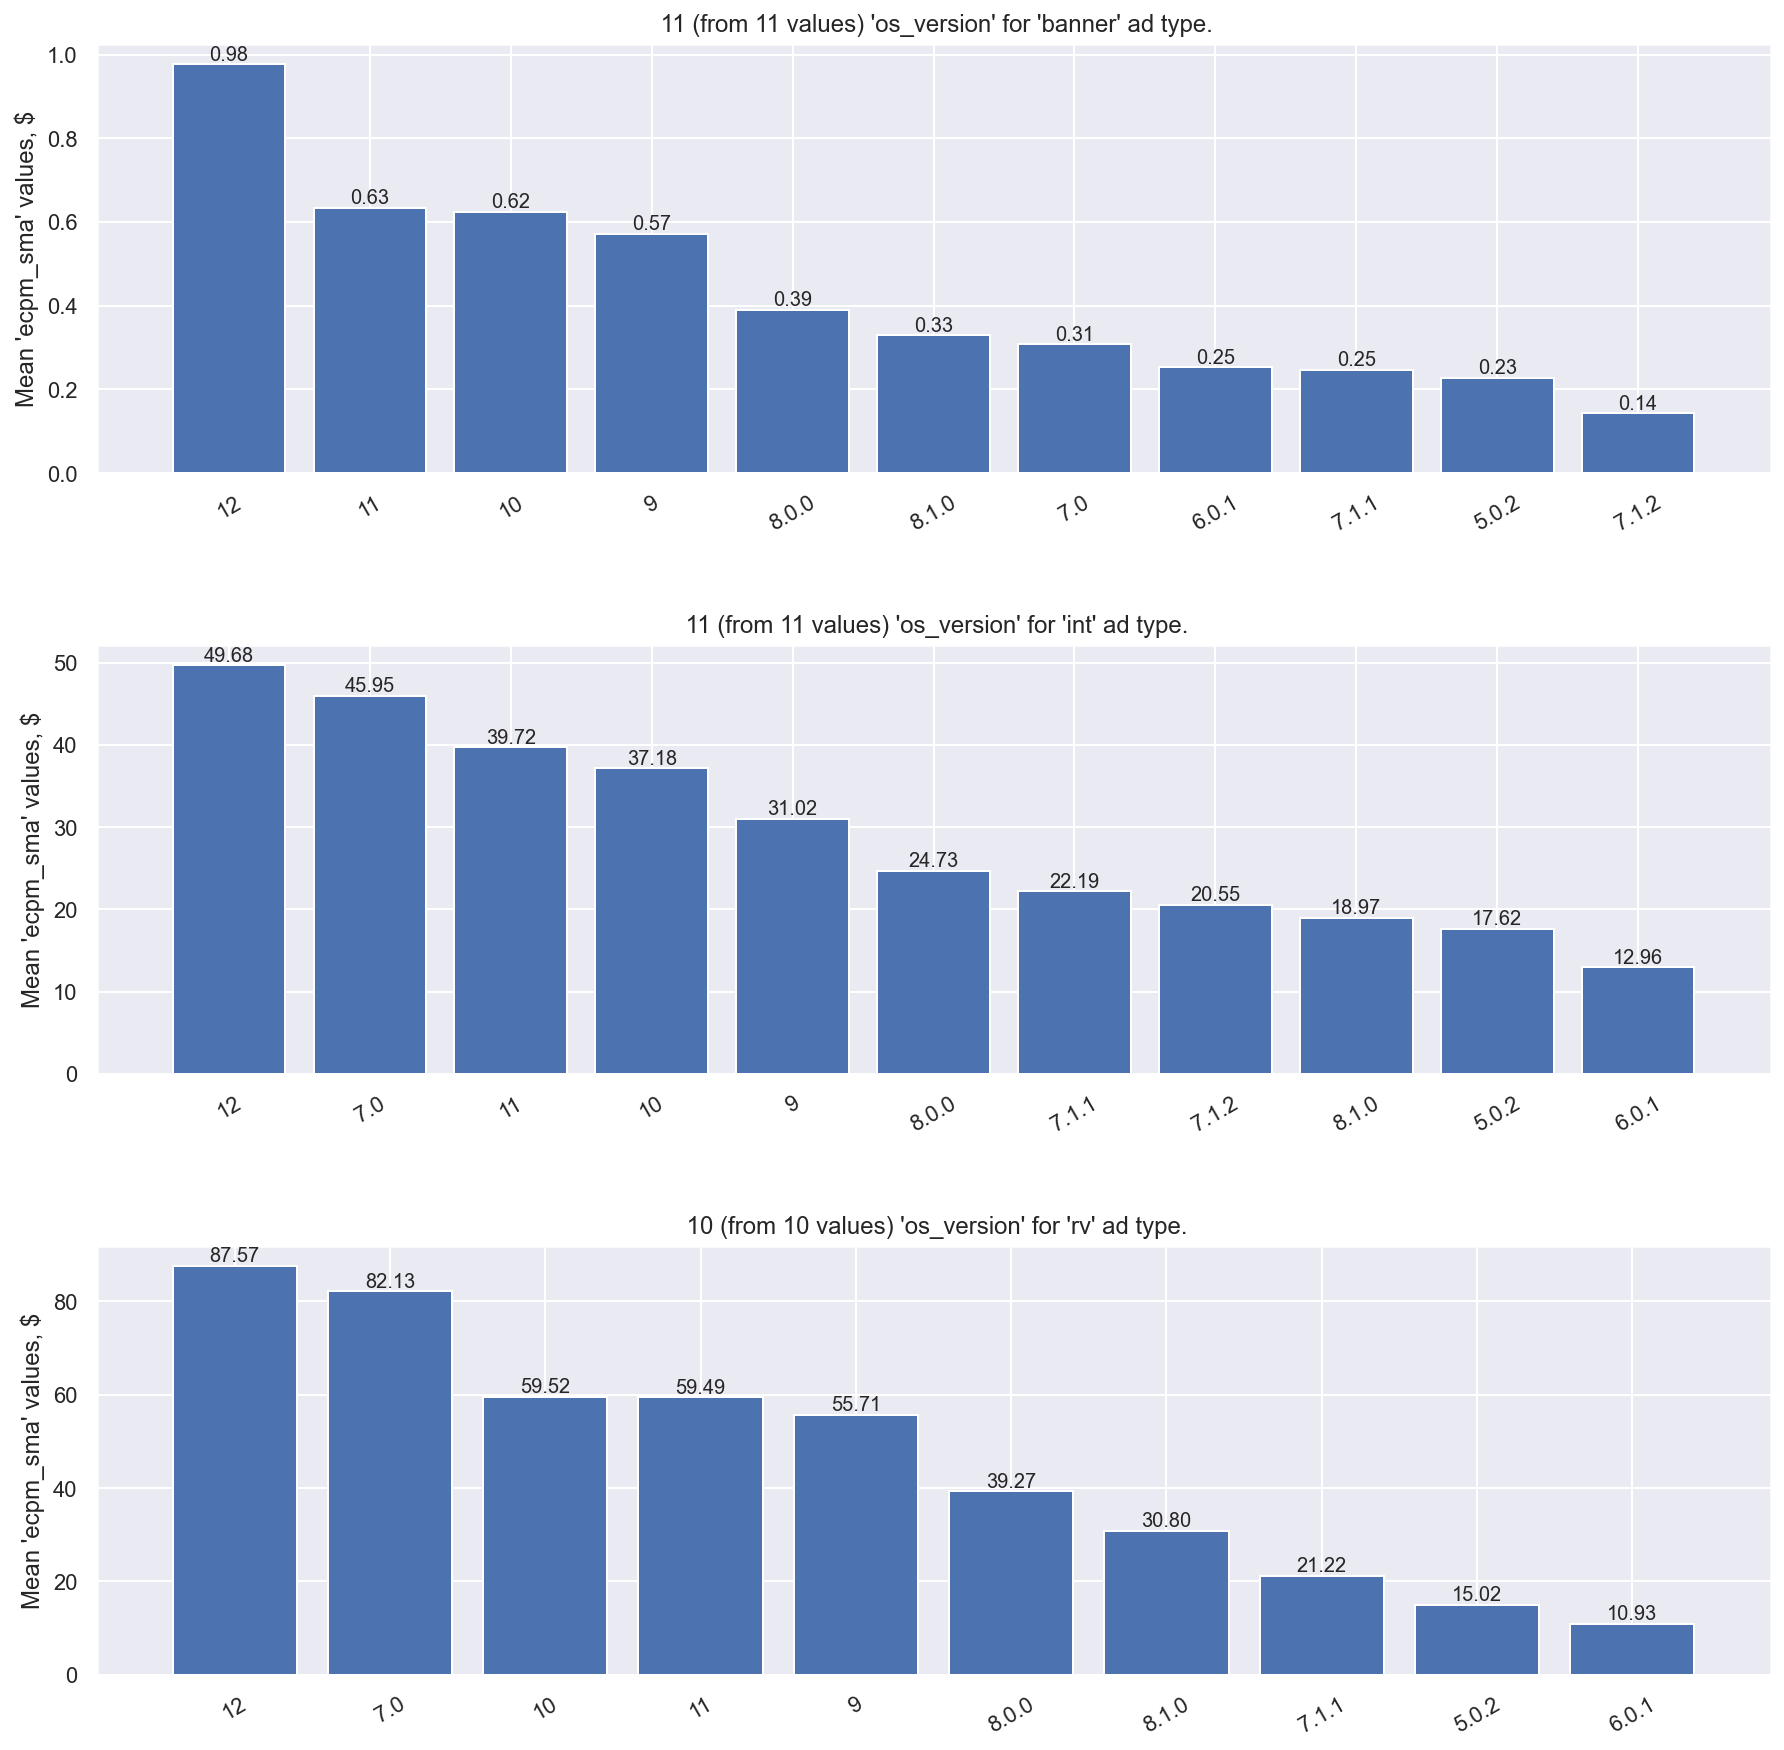

In [25]:
plot_ecpm(df, c="os_version")

The first observation - `banner` mean eCPM decreases almost gradually. There is good correlation between mean eCPM and absolute numeric value of `os_version`. For `rv` and `int` this relationship is broken since 7.0 is on the second place.

Latest OS version 12 leads the pack, most likely because OS 12 devices are expensive, implying that their owners like games more. Indeed, the more person plays mobile games and spends his or her time on them, the more valuable the quality of device becomes for them. However, this logic is applicable only to version 12 and has no arguments for version 7.0 being on the second place for two most expensive ad types, `int` and `rv`. Probably, `device_manufacturer` and `device_model` will help to understand this behavior.

`os_version` aggregated by `device_manufacturer`, top-5 values:

In [26]:
for v in df.os_version.value_counts().index:
    print(df.groupby(["os_version"])["device_manufacturer"].value_counts().loc[v,:][:5])
    print('-'*30)

os_version  device_manufacturer
12          Samsung                341562
            Google                  65942
            OnePlus                    83
Name: device_manufacturer, dtype: int64
------------------------------
os_version  device_manufacturer
11          Samsung                138206
            Motorola                36790
            OnePlus                  9582
            LG                       9042
            Google                   5893
Name: device_manufacturer, dtype: int64
------------------------------
os_version  device_manufacturer
10          Samsung                102423
            Motorola                21789
            LG                      17759
            Google                   1519
            T-Mobile                 1244
Name: device_manufacturer, dtype: int64
------------------------------
os_version  device_manufacturer
9           Samsung                54867
            LG                      6009
            Motorola           

First, **7.1.2** is either not supported by Samsung (which is the most popular Android device, at least in the US) or removed from its devices. Second, **5.0.2** (Samsung only) is higher than **6.0.1** (Samsung and Motorola). Third, Google supports only two lower versions apart from the newest one (currently, **12**, **11**, and **10**), making Samsung even more unbeatable on OS versions under 10. Moreover, internet research has shown that Andoid Nougat (**7.0**) is the best version of 3-4 years ago time because it has small to no changes prior to versions **8.0** and is huge step from **6.0**. Apart from this notice, it is possible that **7.0** is most stable OS and suits for mobile gaming better than introduced **8.0** or **9.0**. Also, **7.0** indicates that mobile devices for this OS are not state-of-the-art technologies, being most popular among users playing games already for a long time, thus, trying new games more and not playing best ones like Genshin Impact.

**Note**: there is no need to apply **minimum operations restriction** since number of OS versions is small - 11.

#### Mean  total revenues (`ads_ltv`) from users based on city/OS versions for every ad type

`ads_ltv` is the only variable which containts data before the time frame of this dataset, since it includes the whole "money" history of users. `ads_ltv` variable is cumulative, but only highest values for each user could not be taken before aggregation by `city` or `os_version` (for example, if Jack living in city A decided to visit granparents in city B and made last "contribution" in city B, information about city A vanishes if using this approach).

##### `city`

`plot_ecpm` function does not provide aggregation by `profile_id`, so it is copied here with slight modification - it displays maximum value of each user in every city and counts only ones who pass **minimum operations restriction**. Considering the previous example, for Jack case, city A will be counted without his last operation in city B, whereas city B will not be counted for him. The loss of one operation is not an issue since across big time period, Jack will return home (city A) and make operations from here, and `ads_ltv` variable will include operation from city B.

In [27]:
def plot_ecpm_users(df, c1, c2="profile_id", display="ecpm_sma", top=None, bottom=None, min_ops=0):
    """
    Plots twice aggregated bar plot, particularly three vertically stacked subplots for three ad types. By default,
    takes the whole range of aggregated values if `top` and `bottom` (used for slicing) parameters are not specified.
    Note that title of subplots is defined by passed `top` and `bottom`. Assumptions:
    * aim to extract from top - positive `top` is passed only.
    * aim to extract from bottom - negative `bottom` is passed only.
    * aim to extract inner range - both `top` and `bottom` are passed.
    
    :param df: dataset containing "ad_type" and "ecpm_sma" columns.
    :param c1 and c2: features of dataset to aggregate by, first c1, then c2.
    c2 is then unstacked and c1 used as index.
    :param display: column to display - "espm_sma" be default.
    :param top: upper bound of range, None by default.
    :param botton: lower bound of range, None by default.
    :param min_ops: minimum number of ad operations required for user (c2="profile_id") to be in column c1.
    """
    adjust = False
    if bottom and top:
        way = "In-range"
        pointer = abs(abs(bottom) - abs(top))
    elif bottom:
        way = "Bottom"
        pointer = abs(bottom)
    elif top:
        way = "Top"
        pointer = abs(top)
    else:
        way = ""
        adjust = True
        
    fig, axes = plt.subplots(figsize=(15,15), nrows=3, ncols=1)
    for i, f in enumerate(df["ad_type"].value_counts().index):
        
        indexes = df[df["ad_type"] == f].groupby([c1, c2])[display].count(). \
                 apply(lambda x: x if x >= min_ops else None). \
                 dropna().unstack().aggregate(func=sum, axis=1).index
        
        data = df[df["ad_type"] == f].groupby([c1, c2])[display].max(). \
                                      unstack().aggregate(func=sum, axis=1)[indexes]
        data = np.array(sorted(np.c_[data.index, data.values], key=lambda x: x[1], reverse=True)) # sort
        
        if adjust:  # when top and bottom are not passed, `pointer` should every time be adjusted to len of data
            pointer = len(data)
        
        axes[i].bar(x=range(pointer), height=data[:,1][bottom:top])
        axes[i].set_xticks(ticks=range(pointer), labels=data[:,0][bottom:top], rotation=30)
        axes[i].set(title=f"{way} {pointer} (from {len(data)} values) '{c1}' for '{f}' ad type.",
                    ylabel=f"Total '{display}' values, \$")
        axes[i].bar_label(axes[i].containers[0], fontsize=10, fmt="%.2f")
        
        plt.subplots_adjust(hspace=0.4)

Cities with highest total revenues and **minimum operations restriction** of 10:

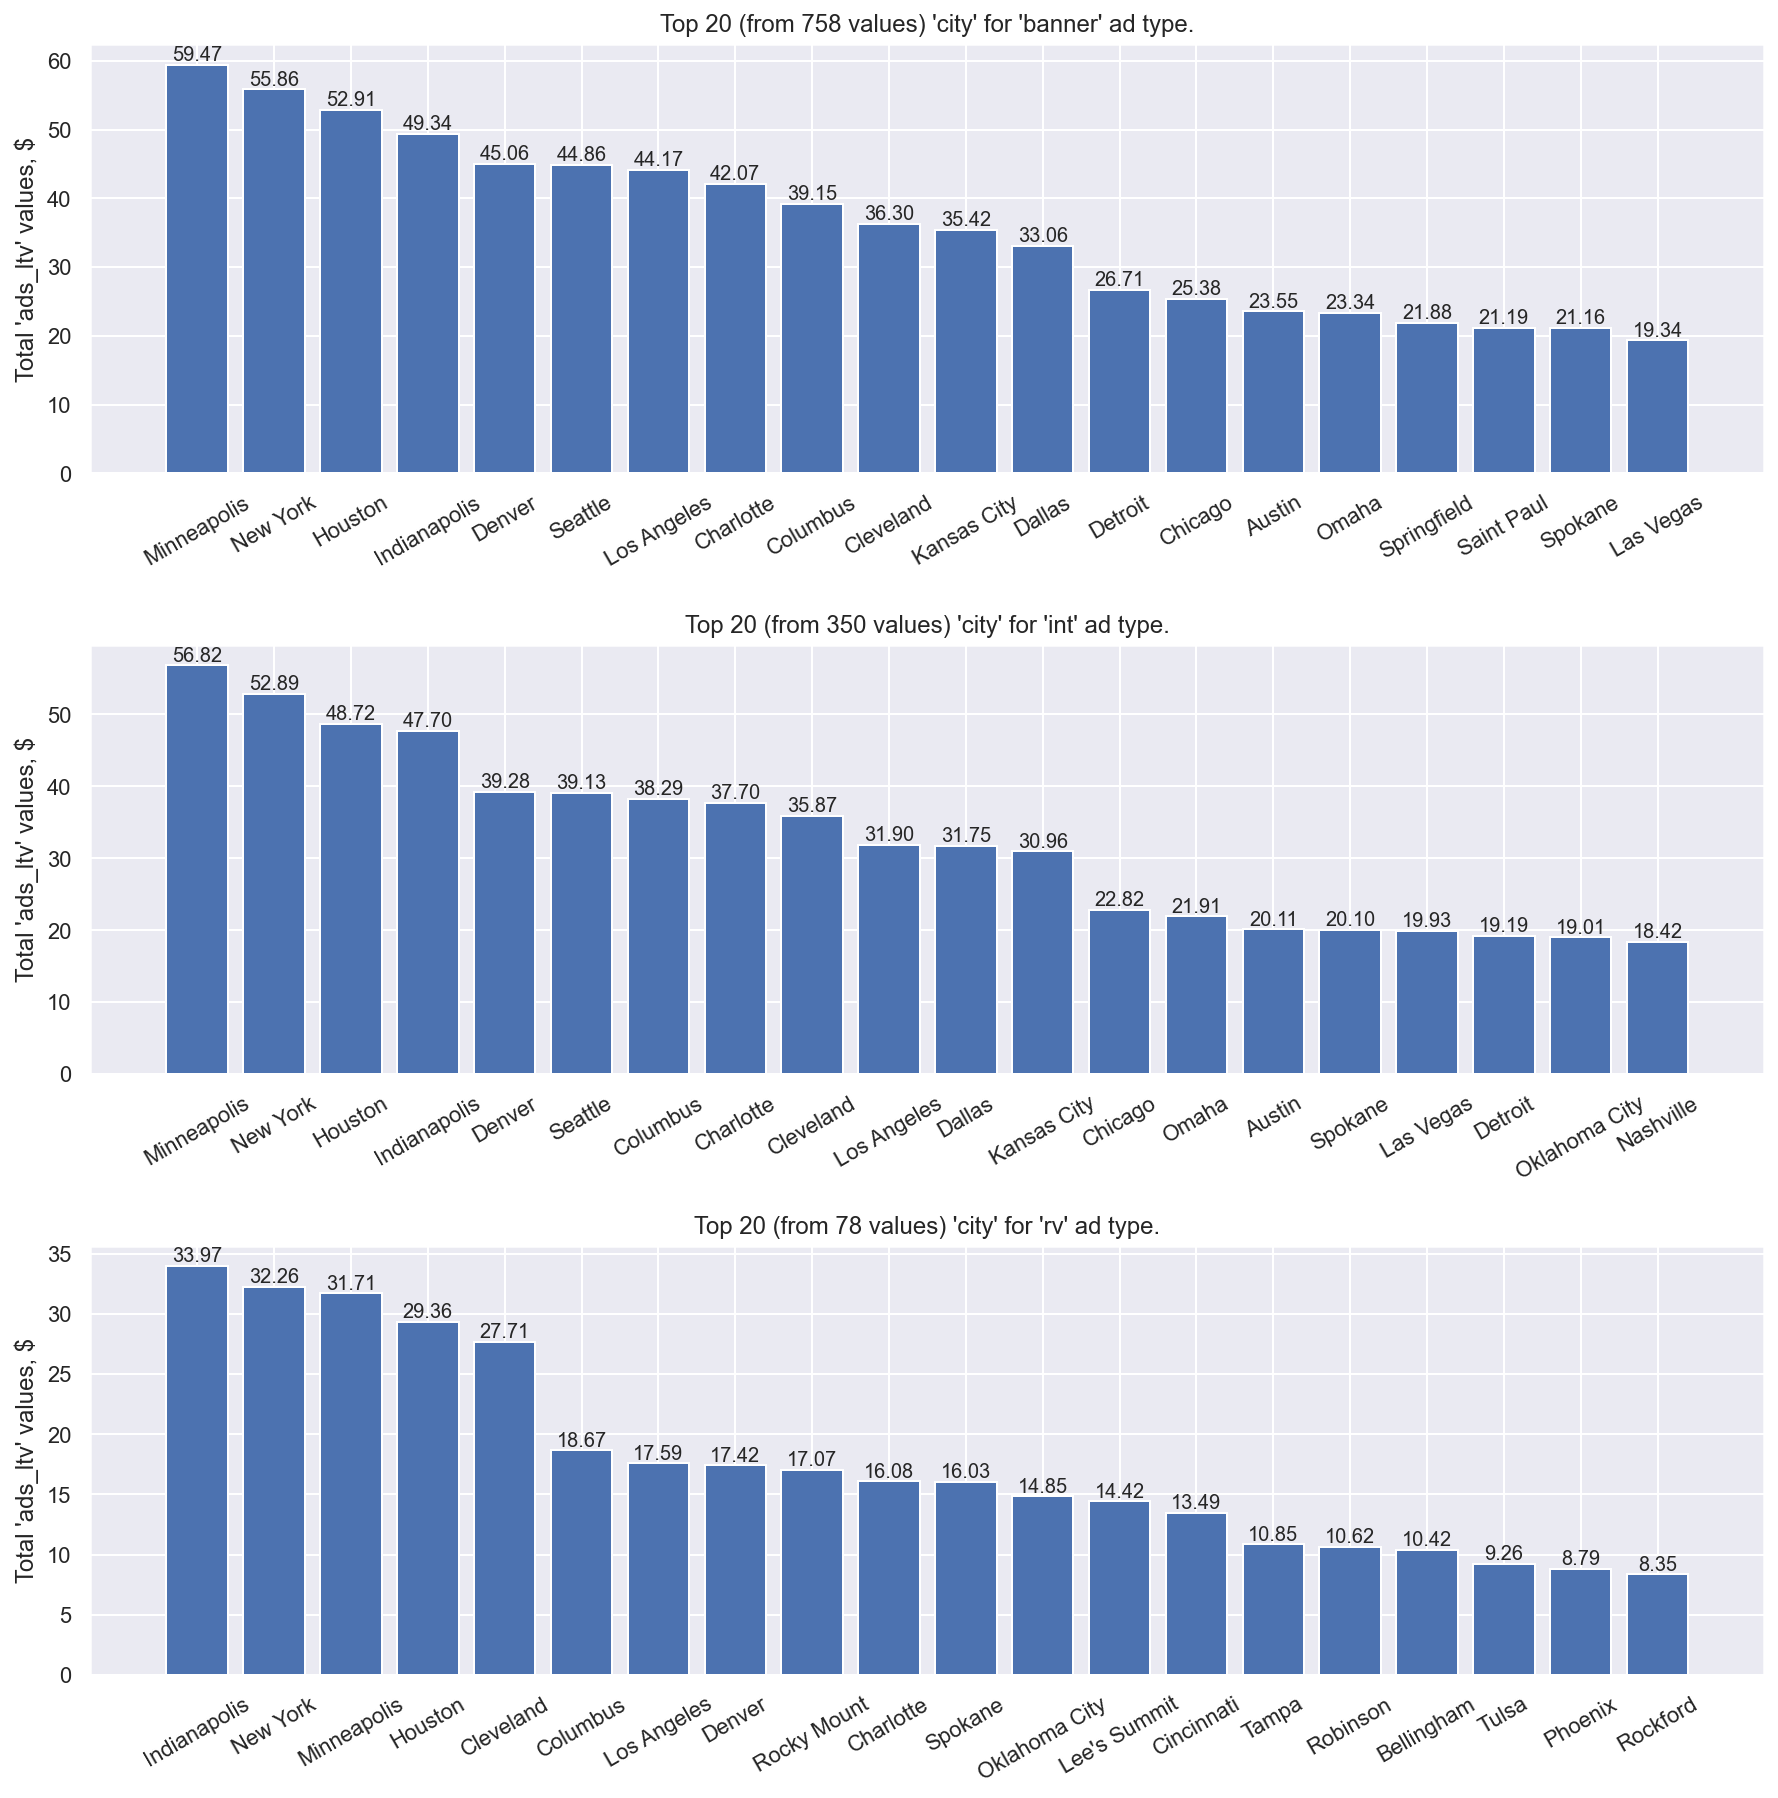

In [28]:
plot_ecpm_users(df, c1="city", top=20, display="ads_ltv", min_ops=10)

The results are different from previous `city` analysis since here, number of operations highly influence the total revenue. This graph reflects cities with highest *total* revenue, whereas previous `city` graph illustrated cities with highest *average* revenue (eCPM = revenue $\times$ 1000, so highest eCPM is equivalent to highest revenue).

Thus, comparison with *gamers population sizes* can explain new cities in the top:

In [29]:
print("City" + " "*12 + "Operations")
df["city"].value_counts()[:10]

City            Operations


New York        17584
Minneapolis     12980
Houston         10137
Springfield     10135
Charlotte        9750
Chicago          8697
San Antonio      7912
Indianapolis     7126
Kansas City      7038
Gallatin         6573
Name: city, dtype: int64

Indeed, all top-4 cities on graph above are in top-10 cities with highest number of operations. Rocky Mount, which is top-1 highest average eCPM city in `rv`, here is 9th on the list.

As already mentioned, this metric highly correlates with population of the whole city. Thus, the higher the population, the higher the number of people playing particular game, given probability of randomly selected person playing this game is constant (or averaged and taken as constant). Finding the city which has the greatest total revenue is not very helpful. It is more relevant to target city which has high users population in combination with high average revenue. Even in that approach, value of gamers population and value of average revenue must be measured in some relative units and weighted according to business opportunities and preferences. This will create a 3D graph where the global maxima should be found and a tradeoff as well - favoring higher population or favoring higher average revenue. Large weight for population may lead to cities with low mean eCPM and vice versa. East-Peoria would be a boundary value of that kind of graph, where population is 1 (minimum of user population), mean eCPM is 900+ (maximum of average revenue), and the $z$-axis value ($f(\text{population, mean eCPM})$) is the output of function depending on the two parameters. This approach can find best city with specified parameters and weights (coefficients).

Implementation of that approach could also be in the separate analysis about geographical pecularities.

##### `os_version`



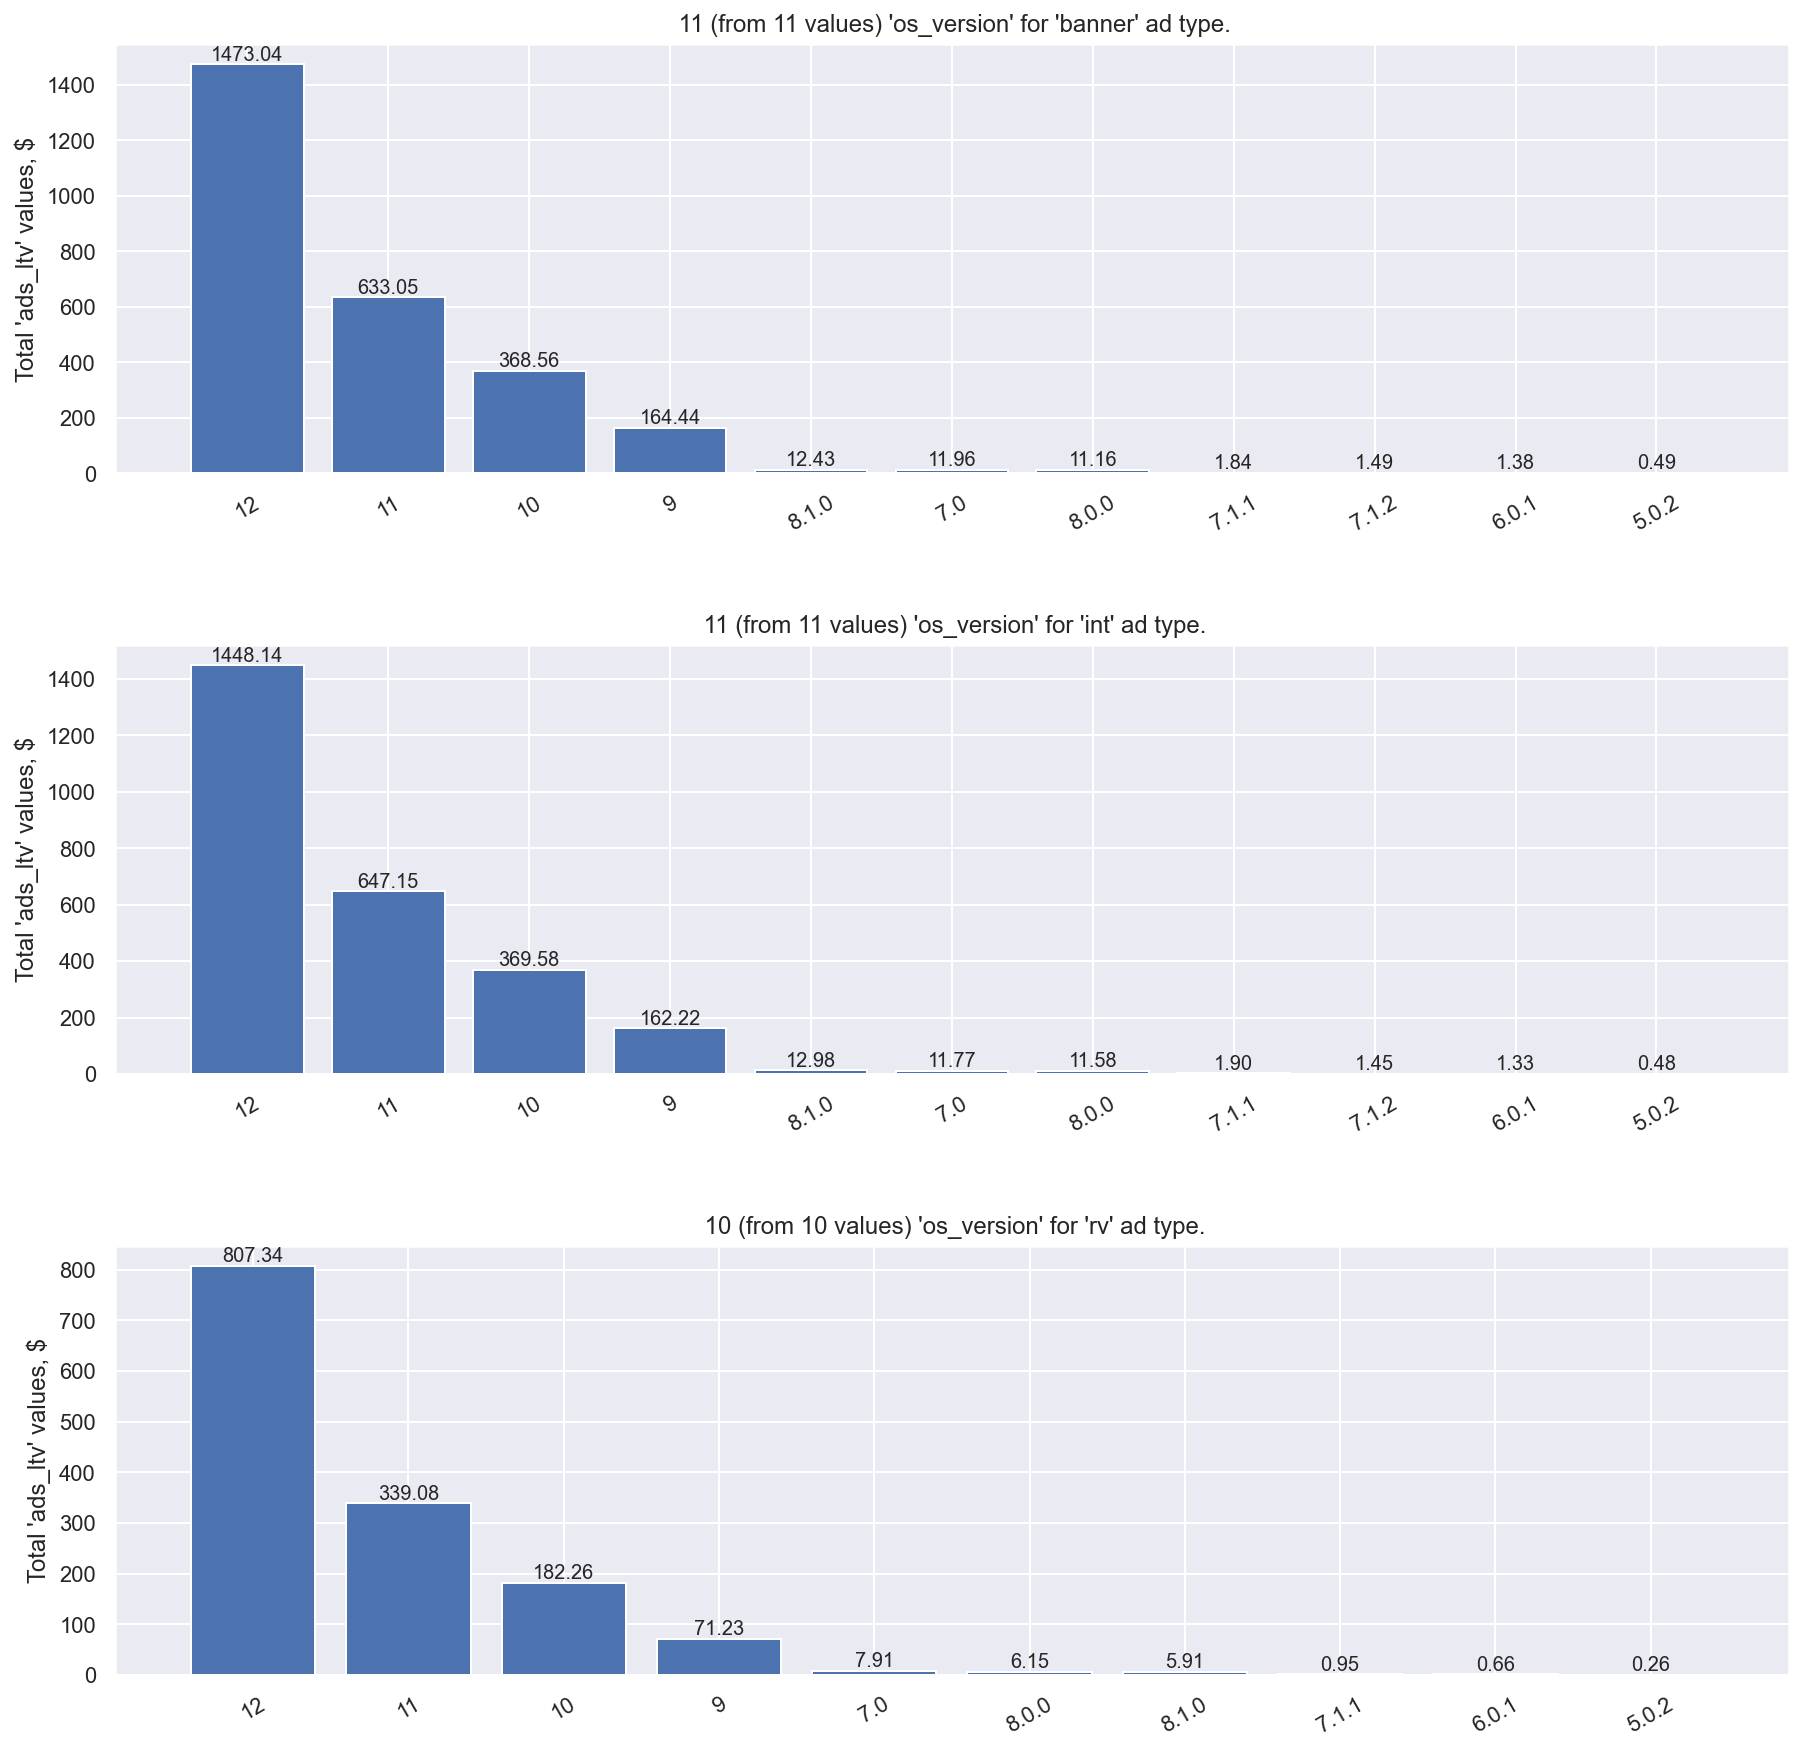

In [30]:
plot_ecpm_users(df, c1="os_version", display="ads_ltv", min_ops=0)

Population of users playing on OS **12** plays the significant role, as it was in case with cities. Around 407k play on OS **12**, whereas second most popular OS has twice as less players. `banner` ad type behaves the same way it does on any other graph - gradually decreases with OS version (one mispair - (**8.0.0**, **7.0**)). The same behavior is observed among other ad types, and the summary statistics below explains the trend:

In [31]:
print("OS" + " "*7 + "Operations")
df["os_version"].value_counts()

OS       Operations


12       407587
11       209071
10       150871
9         66662
8.1.0      9249
8.0.0      8016
7.0        4057
7.1.2      1811
7.1.1      1342
5.0.2       709
6.0.1       704
Name: os_version, dtype: int64

The fact that Android Nougat (OS **7.0**) is so profitable among users plays a vital role - being used twice as less as **8.0.0**, it beats **8.0.0** in terms of total `ads_ltv` for every `ad_type`.

In general, `os_version` on graph above does not provide very useful information apart from OS **7.0** being so extremely popular for operations.

#### eCPM and daytime

eCPM depends on users' activity, and therefore can be influenced by their

In [32]:
def assign_daytime(hour):
    if hour >= 7 and hour <= 10:
        return "morning"
    elif hour >= 11 and hour <= 18:
        return "day"
    elif hour >= 19 and hour <= 23:
        return "evening"
    else:
        return "night"

In [33]:
df["event_daytime"] = df["event_datetime"].apply(lambda x: assign_daytime(x.hour))

In [34]:
def plot_time(df):
    fig, axes = plt.subplots(figsize=(15,6), ncols=3, nrows=1)
    for i, f in enumerate(df.ad_type.value_counts().index):
        data = df[df["ad_type"] == f]
        sns.countplot(ax=axes[i], data=data, x="event_daytime", order=["morning", "day", "evening", "night"])
        axes[i].bar_label(axes[i].containers[0])
        axes[i].set(title=f"'{f}' ad type daytime distribution.")

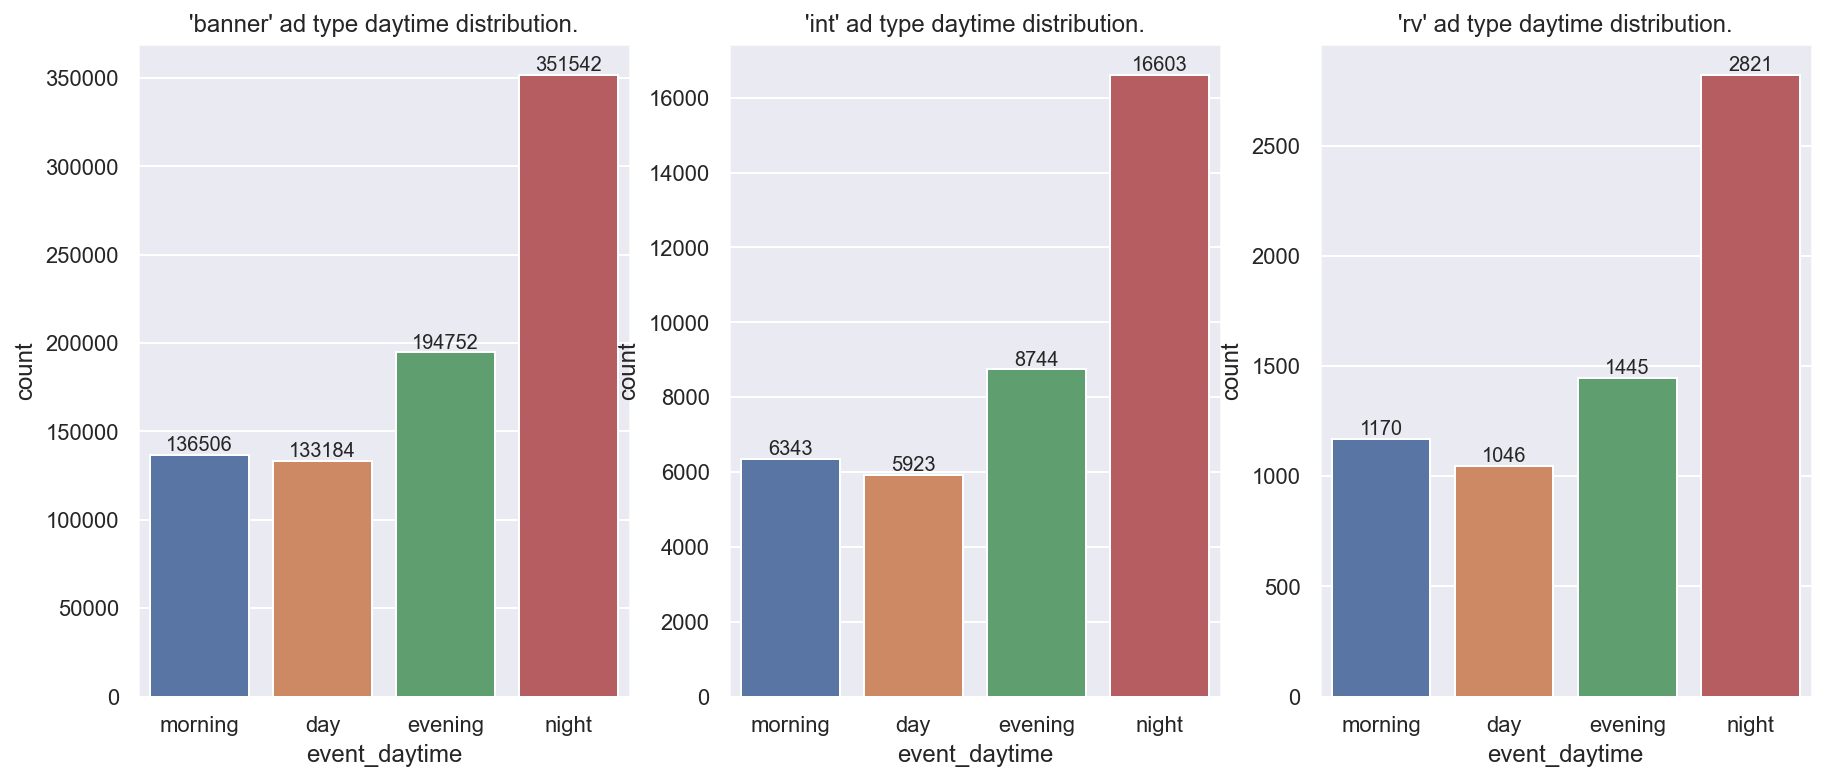

In [35]:
plot_time(df)

Illustration above tells that operations tend to happen mostly during the night, which is obvious - users' most active playtime is night. Distributions are too identical - it means that `ad_type` does not influence anything. Since it does not influence the graph, mean eCPM values should also be identical since they are influenced by the `ad_type`.

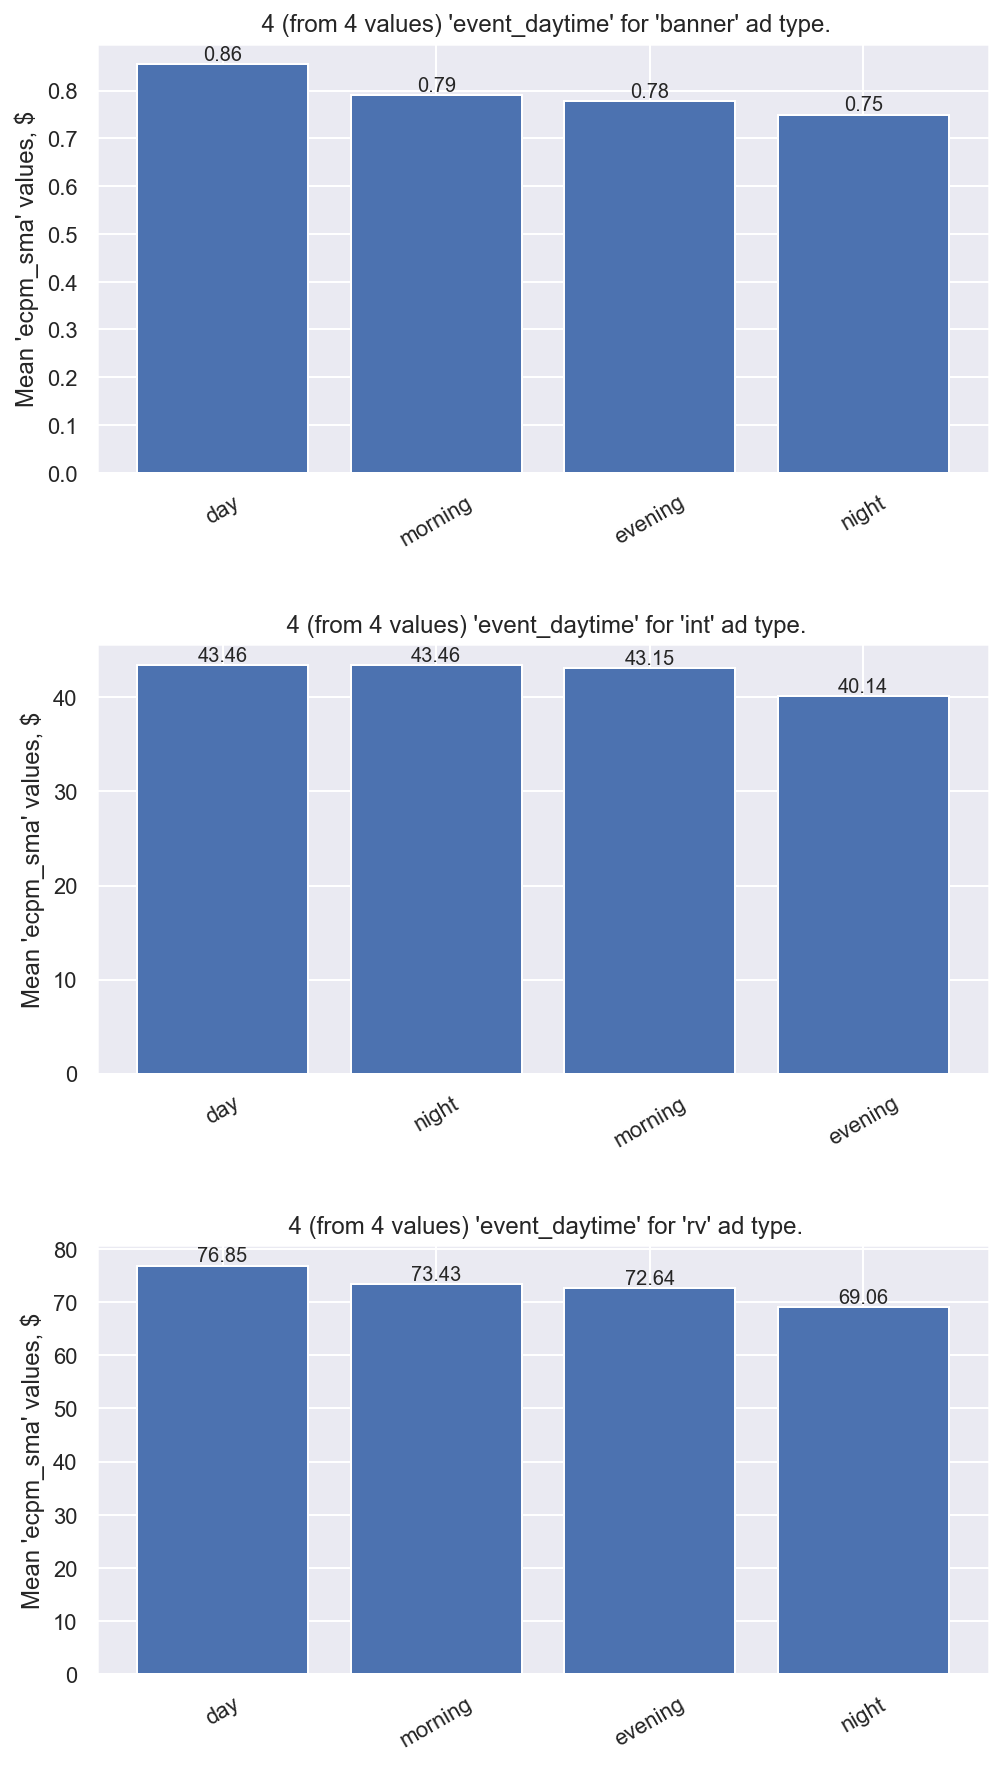

In [36]:
plot_ecpm(df, c="event_daytime", display="ecpm_sma", figsize=(8,15))

Indeed, the distribution of mean eCPM values across daytime are almost uniform - it means that daytime does not influence the eCPM value. Moreover, `day` has the highest mean eCPM value for every `ad_type`, and that is nontrivial. The reason behind that is probably that its absolute length is 8 hours (from 11 AM (11:00) to 6 PM (18:00) inclusive). most long compared to other daytime periods' absolute lengths. Even though the differences with other daytimes are small, `day` still leads the pack. However, relative positions of other daytimes are the same except for `int` where the difference is the smallest ($<7.6\%$ relative range)

#### eCPM and session length

In [37]:
def fr(x, b, k):
    """
    Reciprocal of exponential.
    """
    return (np.exp(-x)*k + b)

In [38]:
def plot_ecpm_session(df):
    fig, axes = plt.subplots(figsize=(15,20), ncols=1, nrows=3)
    for i, f in enumerate(df.ad_type.value_counts().index):
        data = df[df["ad_type"] == f]
        
#         x1, x2 = StandardScaler().fit_transform(data[["ecpm_sma", "session_length"]])
        x1, x2 = data["ecpm_sma"].values.reshape(-1,1), data["session_length"].values.reshape(-1,1)
        X_train, X_test, y_train, y_test = train_test_split(x1, x2, test_size=0.2)
        
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        y_preds = lr.predict(X_test)
        
        axes[i].scatter(X_test, y_test, label="true points", s=20, edgecolors="black", color="yellow")
        axes[i].plot(X_test, y_preds, label="regression line", color="red")
        
        axes[i].legend()
        axes[i].set(title=f"'{f}' ad type",
                    xlabel="ecpm_sma",
                    ylabel="session_length")
        
        plt.subplots_adjust(hspace=0.2)

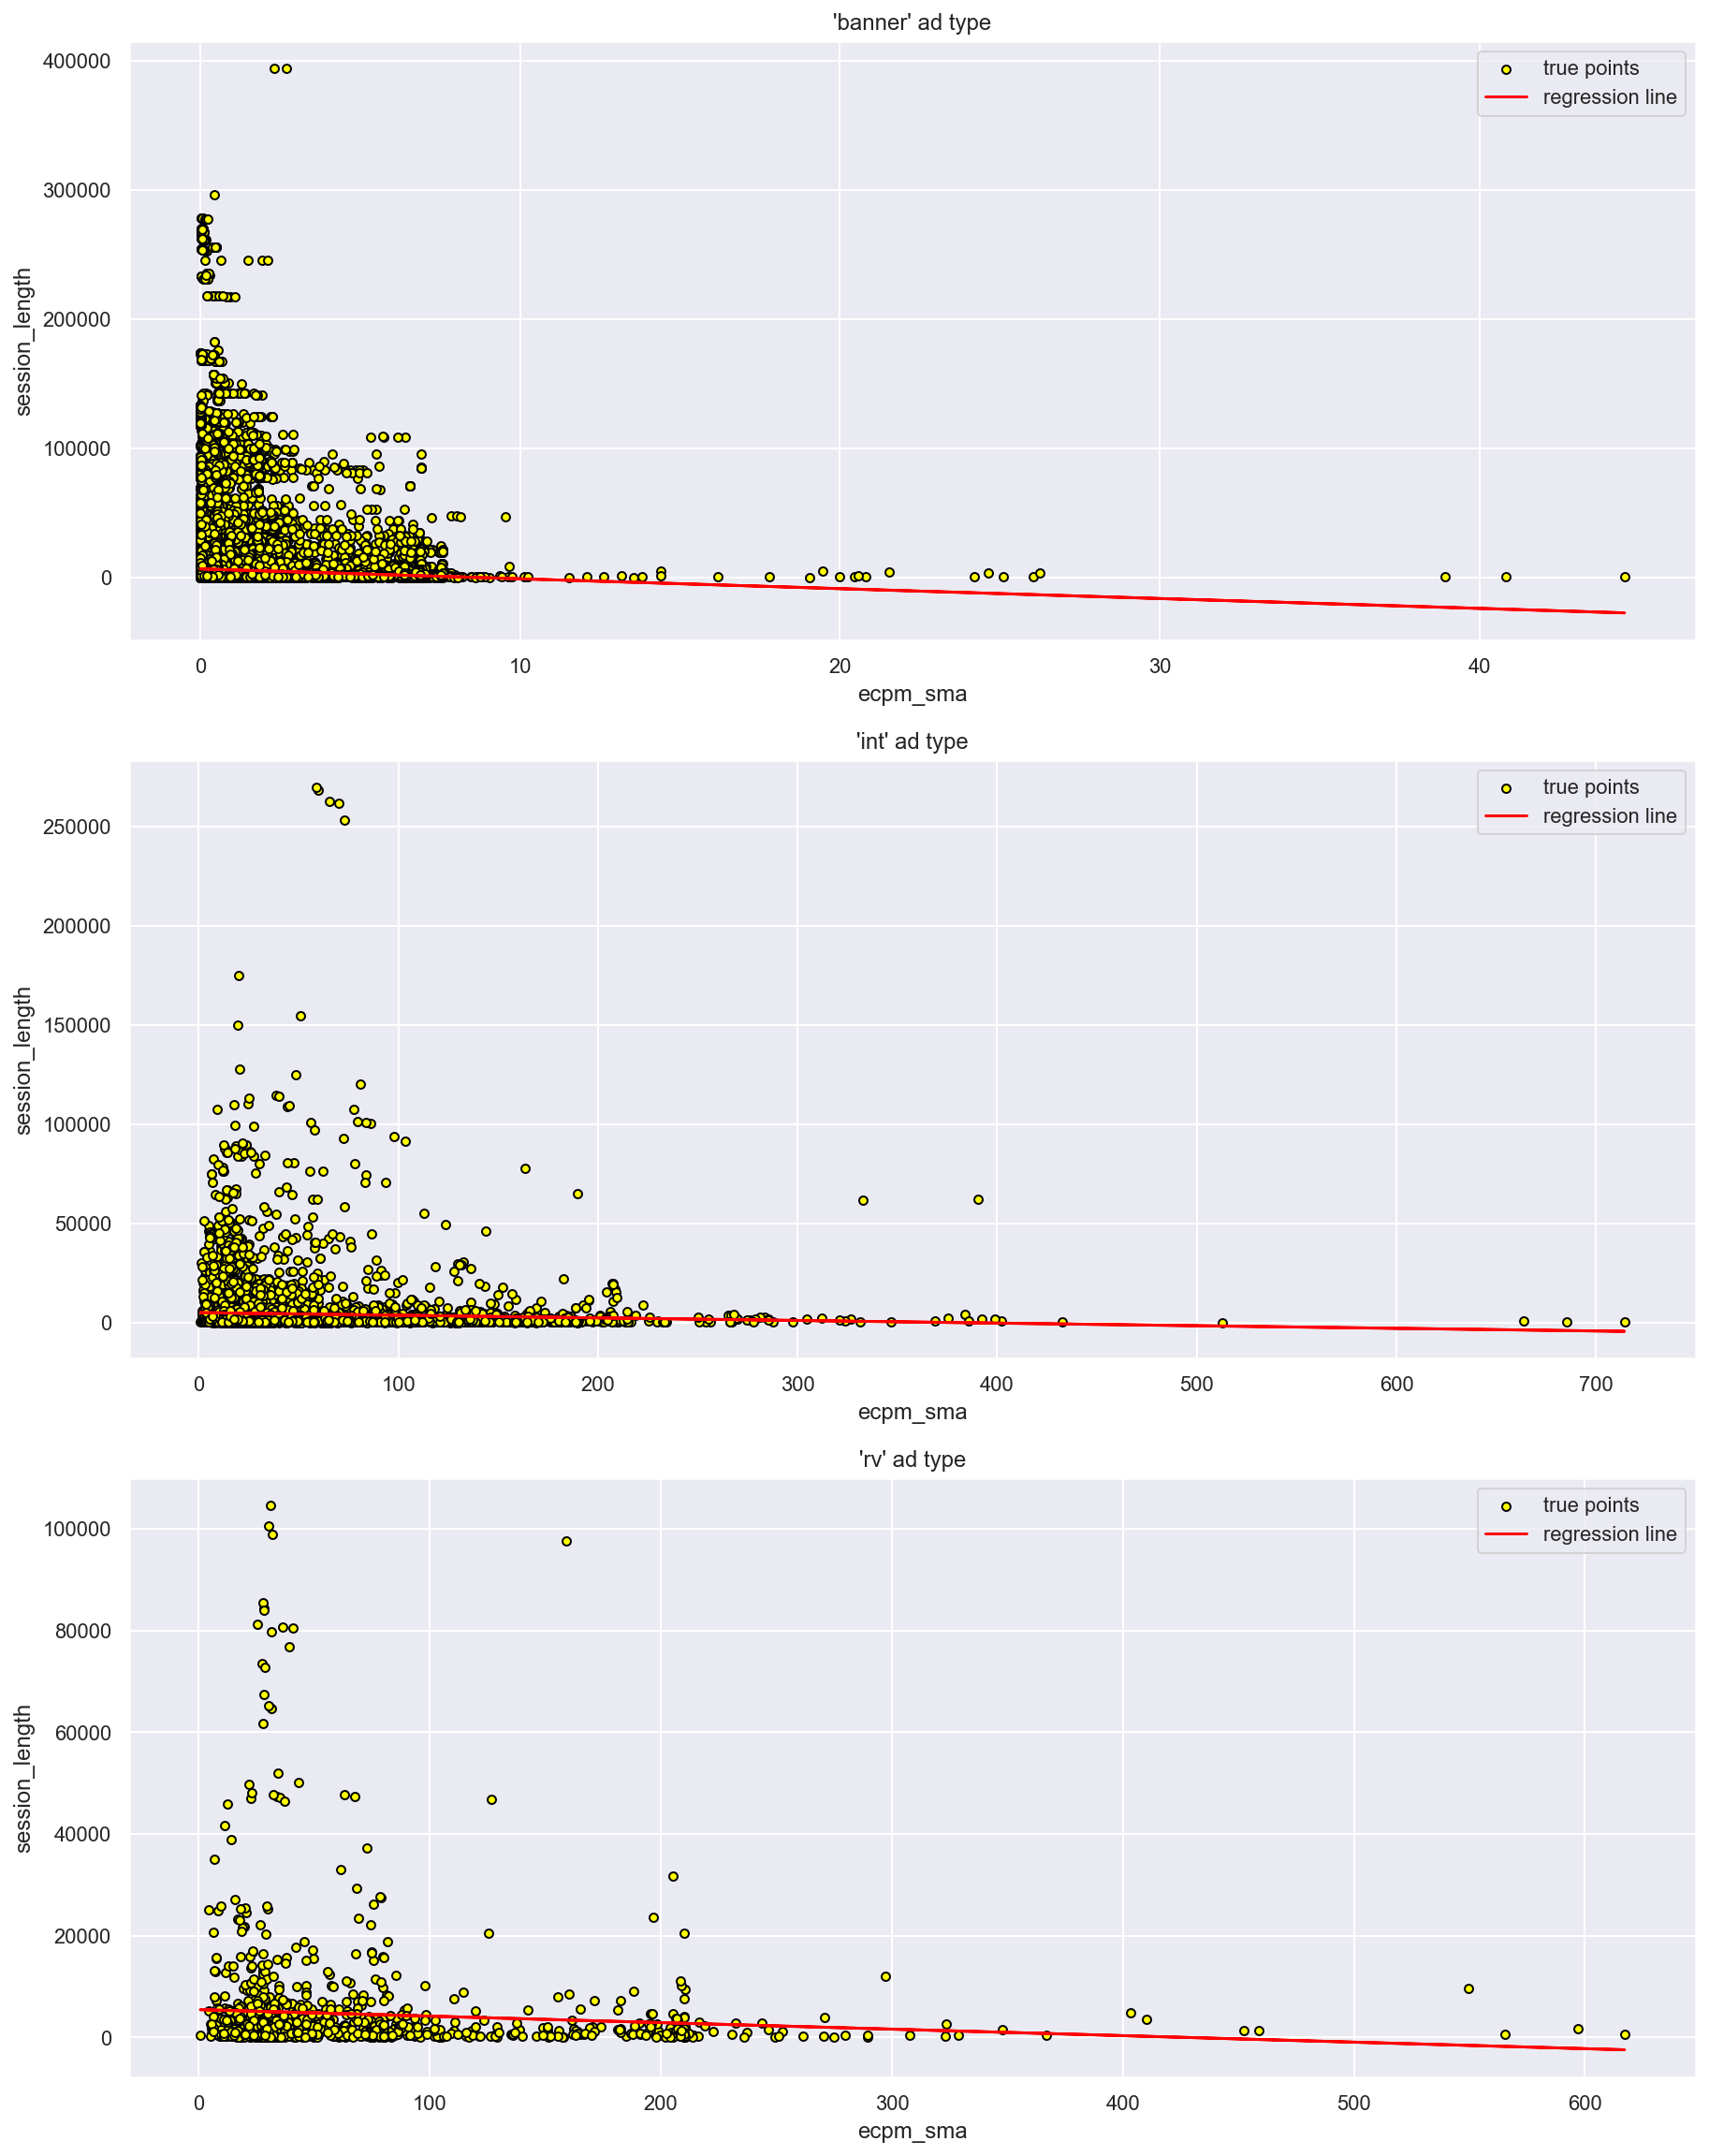

In [39]:
plot_ecpm_session(df)

Absence of linear relationship between `session_length` and `ecpm_sma` is clear, however, higher order relationships and other non-linear ones could be seen here.

`banner` graph suggests that reciprocal of exponential function can fit the data points. That is, the higher the `session_length` value, the lower is the probability of high eCPM value. The same behavior is observed with `int` and `rv`, even though less clearly.

## Results

##### `banner` is uniform regardless of anything else

First, `banner` ad type is explored to be uncorrelated to any kind of dependence. Its distribution is similar to normal ditribution the most, having small long tail at the left, indicating some very rare high eCPM values. According to `os_version` analysis with mean eCPM vales, `banner` has the distribution based on solely the population of OS users. That is, trend the `banner` ad type reflects is related not to it. Thus, conclusion leads to the fact that `banner` does not influence users like `rv` and `int` do. That is, changing some `banner` attributes would unlikely cause any changes in players behavior. `os_version` **7.0** reflects it greately - its users provide high eCPM when `rv` and `int` are used but for `banner` their activity is absolutely normal.

##### `city` and total revenue

First - cities with high population, second - cities with high value of gaming industry (Los Andgeles, Seattle, Denver, Las Vegas). Only then go cities with anomalous amounts of eCPM.

##### `city` and mean eCPM

There are cases when 1 person can elevate the level of city's mean eCPM hugely compared to other cities. There are methods for elimination of these extremes using **minimum operations restriction**, **time restriction**, and weighting cities according to their number of users and mean eCPM values. Thus, the best city according to that  characteristics could be extracted.

##### `os_version` and eCPM

The only anomaly is that Android Nougat (OS **7.0**) is very profitable is terms of average eCPMs, its users are close to OS **12** users at this characterisic. Except for that, eCPMs decrease gradually from newest to oldest Android versions.

Considering manufacturing side, Samsung is mostly preferred for gaming, Motorola comes on the second place. Version **7.1.2** is not supported by Samsung and even is not presented among `rv` ad types impressions.

##### eCPM and other dependancies

Daytime activity of users is distributed as expected - `evening` and `night` are preferred for gaming. However, the distribution of eCPM means for daytime periods is uniform - even though much more people play at `night` than at `morning`, profit from eCPM is the same for both. `day` is the best time for eCPMs, however, its period (8 hours) is the longest among other daytimes periods and therefore takes in more people, leading to conclusion that distribution of eCPMs thoughout the day is uniform, indicating that the two are not correlated.